In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform
from sklearn import preprocessing
import re

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

In [2]:
# data 로드
vod = pd.read_csv('vod_prepro_series_nm.csv')
con = pd.read_csv('con_prepro_series_nm.csv', encoding='cp949')

In [3]:
vod

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,Category,rename,vod_id
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230812163507,TV프로그램,그것이알고싶다,297
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230816205227,TV프로그램,그것이알고싶다,297
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230829194727,TV프로그램,그것이알고싶다,297
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,20230813130609,TV프로그램,그것이알고싶다,297
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,20230804092737,TV프로그램,꼬리에꼬리를무는그날이야기,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,학습,6.0,인기작가 서현의 그림책! 온몸으로 읽는 그림책 간질간질. 글자가 형태로 보이지 않고...,-,6,20230914211110,키즈,간질간질,3674
10157,66317000,알사탕,키즈,학습,8.0,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,20230903223544,키즈,알사탕,3671
10158,66317000,알사탕,키즈,학습,3.3,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,20230903223210,키즈,알사탕,3671
10159,66900000,월간 아기상어,키즈,학습,0.8,8-Bit Baby Shark. 오락실에 아기 상어가 나타났다?! 추억의 8비트 버...,아기상어,1,20230904120057,키즈,월간아기상어,406


In [4]:
con

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id
0,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071155,키즈,핑크퐁동물동요,882
1,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,20230813071215,키즈,핑크퐁동물동요,882
2,63086000,지니강이 플러스 시즌7,지니강이 플러스 시즌7,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",11,20230827145542,키즈,지니강이플러스시즌7,1622
3,63086000,지니강이 플러스 시즌9,지니강이 플러스 시즌9,키즈,기타,지니가 화장품으로 슬라임을 만들어요. / 슈퍼히어로 강이! 문을 열면 춤을 춰요.,"헤이지니,럭키강이",11,20230827152417,키즈,지니강이플러스시즌9,2043
4,62733000,엘리가간다 시즌12,엘리가간다 시즌12,키즈,기타,미니 시리얼 팬케이크 만들기.,-,13,20230816112816,키즈,엘리가간다시즌12,1958
...,...,...,...,...,...,...,...,...,...,...,...,...
21124,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121656,키즈,슈퍼토끼,544
21125,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121646,키즈,슈퍼토끼,544
21126,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,키즈,슈퍼토끼,544
21127,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,20230930121655,키즈,슈퍼토끼,544


In [5]:
con['log_dt'] = pd.to_datetime(con['log_dt'], format='%Y%m%d%H%M%S')
con

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id
0,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,2023-08-13 07:11:55,키즈,핑크퐁동물동요,882
1,65968000,핑크퐁 동물 동요,핑크퐁 동물 동요,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,2023-08-13 07:12:15,키즈,핑크퐁동물동요,882
2,63086000,지니강이 플러스 시즌7,지니강이 플러스 시즌7,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",11,2023-08-27 14:55:42,키즈,지니강이플러스시즌7,1622
3,63086000,지니강이 플러스 시즌9,지니강이 플러스 시즌9,키즈,기타,지니가 화장품으로 슬라임을 만들어요. / 슈퍼히어로 강이! 문을 열면 춤을 춰요.,"헤이지니,럭키강이",11,2023-08-27 15:24:17,키즈,지니강이플러스시즌9,2043
4,62733000,엘리가간다 시즌12,엘리가간다 시즌12,키즈,기타,미니 시리얼 팬케이크 만들기.,-,13,2023-08-16 11:28:16,키즈,엘리가간다시즌12,1958
...,...,...,...,...,...,...,...,...,...,...,...,...
21124,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544
21125,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544
21126,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:55,키즈,슈퍼토끼,544
21127,64551000,슈퍼 토끼,슈퍼 토끼,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:55,키즈,슈퍼토끼,544


In [6]:
con.drop_duplicates(inplace=True)
con[con.duplicated()]

,subsr,series_nm,super_asset_nm,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id


In [7]:
vod.rename(columns={'strt_dt':'log_dt'}, inplace=True)
vod['log_dt'] = pd.to_datetime(vod['log_dt'], format='%Y%m%d%H%M%S')
vod.drop_duplicates(inplace=True)
vod[vod.duplicated()]

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id


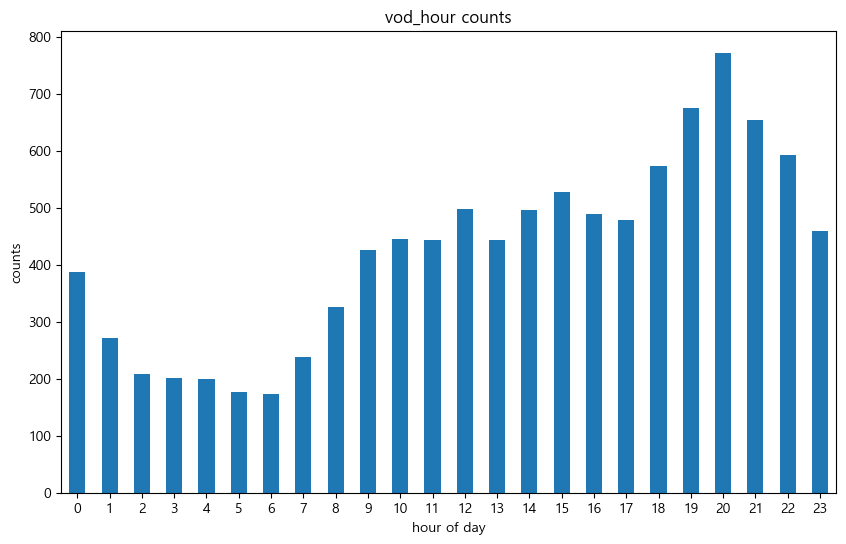

In [8]:
# 시간 추출
vod['hour'] = vod['log_dt'].dt.hour
hour_counts = vod['hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
hour_counts.plot(kind='bar')
plt.title('vod_hour counts')
plt.xlabel('hour of day')
plt.ylabel('counts')
plt.xticks(rotation=0)
plt.show()

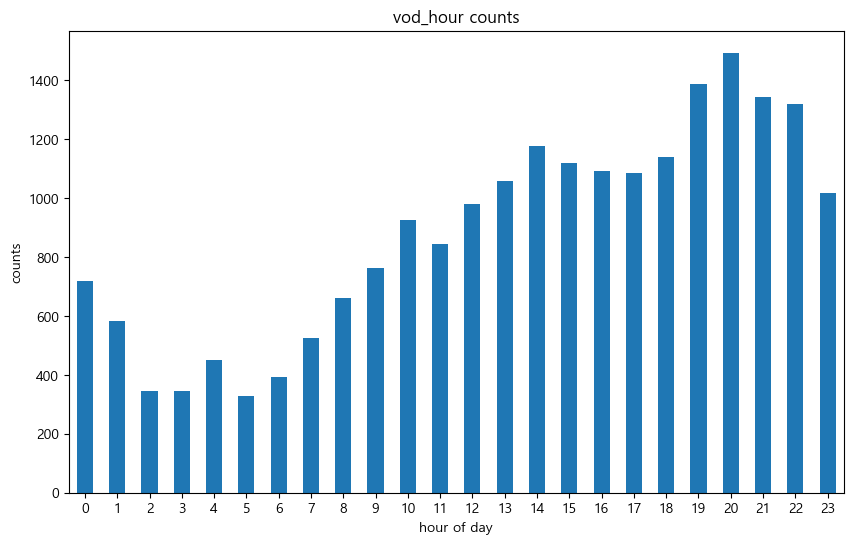

In [9]:
# 시간 추출
con['hour'] = con['log_dt'].dt.hour
con_hour_counts = con['hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
con_hour_counts.plot(kind='bar')
plt.title('vod_hour counts')
plt.xlabel('hour of day')
plt.ylabel('counts')
plt.xticks(rotation=0)
plt.show()

In [10]:
total = pd.concat([vod, con])
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,series_nm,super_asset_nm
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16,NaN,NaN
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20,NaN,NaN
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19,NaN,NaN
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13,NaN,NaN
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,NaN,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼
21123,64551000,NaN,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼
21124,64551000,NaN,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼
21125,64551000,NaN,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼


In [11]:
total.asset_nm.fillna(total.series_nm, inplace=True)
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,series_nm,super_asset_nm
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16,NaN,NaN
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20,NaN,NaN
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19,NaN,NaN
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13,NaN,NaN
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼
21123,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼
21124,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼
21125,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,슈퍼 토끼,슈퍼 토끼


In [12]:
total.drop(['series_nm', 'super_asset_nm'], axis=1, inplace=True)
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12
21123,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12
21124,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12
21125,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12


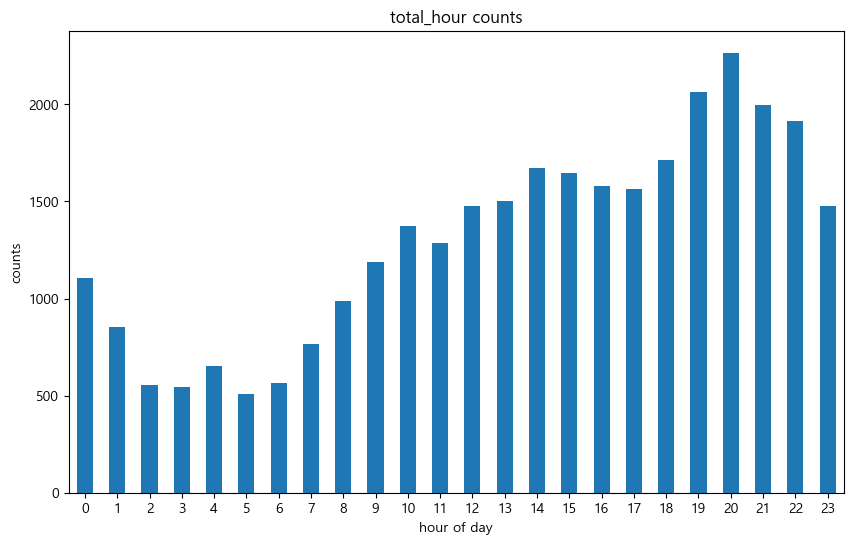

In [13]:
total_hour_counts = total['hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
total_hour_counts.plot(kind='bar')
plt.title('total_hour counts')
plt.xlabel('hour of day')
plt.ylabel('counts')
plt.xticks(rotation=0)
plt.show()

In [14]:
# 시간대별로 가장 많이 본 vod_id 순위 나열
# hour, vod_id 별로 그룹화
count_by_hour = total.groupby(['hour', 'vod_id']).size()

# 결과를 새로운 열에 추가
count_by_hour = count_by_hour.reset_index(name='count')

# count 기준으로 정렬
count_by_hour = count_by_hour.sort_values(by=['hour', 'count'], ascending=[True, False])

count_by_hour

,hour,vod_id,count
23,0,143,31
306,0,3576,27
95,0,754,24
123,0,908,22
7,0,16,21
...,...,...,...
9208,23,4562,1
9209,23,4599,1
9210,23,4616,1
9211,23,4623,1


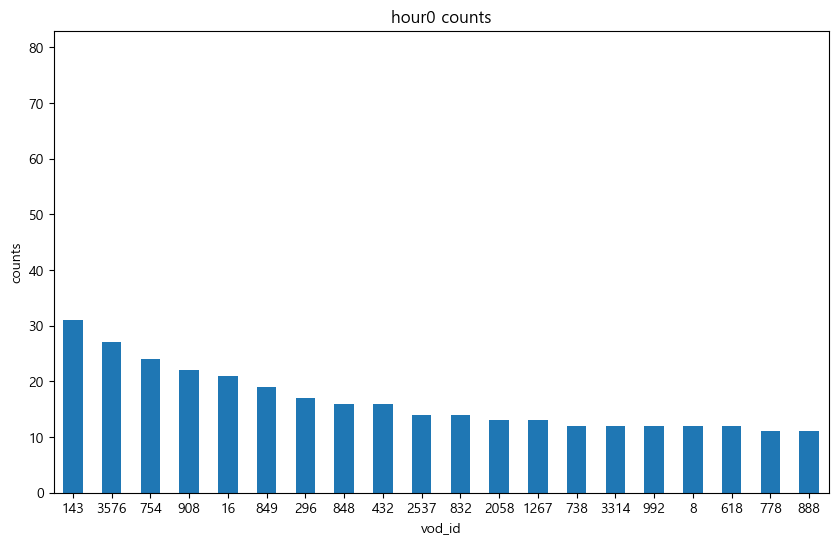

      vod_id  count         rename
0        143     31          심야괴담회
392     3576     27           해피엔드
679      754     24          최강배달꾼
1153     908     22           천고결진
1380      16     21         TV동물농장
1737     849     19        암련,귤생회남
1849     296     17            런닝맨
2474     848     16        뽀로로인기동요
2532     432     16          나혼자산다
2773    2537     14          범죄도시3
3356     832     14         조선의사랑꾼
3450    2058     13            귀공자
3639    1267     13          러브포세일
4005     738     12          하늘의인연
4353    3314     12       초대:스와핑데이
4543     992     12        전문중적진천천
4583       8     12  꼬리에꼬리를무는그날이야기
5094     618     12            올빼미
5263     778     11      구소한야난너의온도
5441     888     11  경이로운소문2:카운터펀치


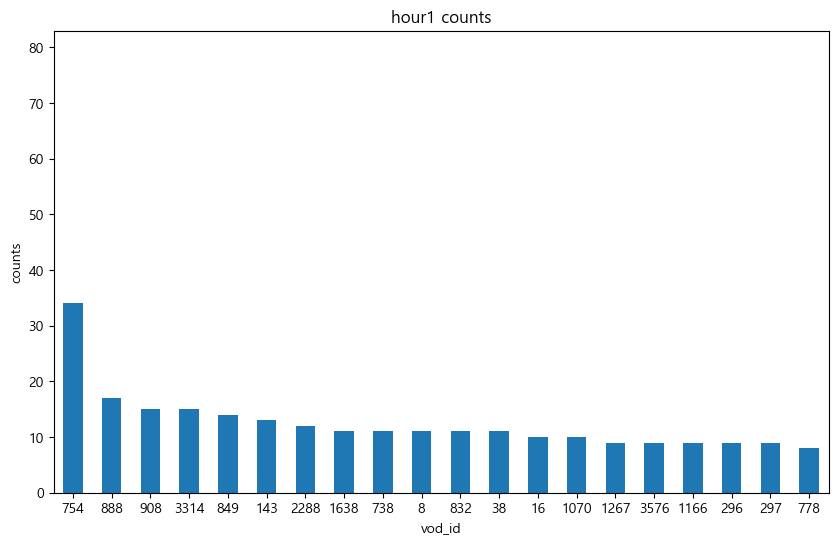

      vod_id  count         rename
0        754     34          최강배달꾼
474      888     17  경이로운소문2:카운터펀치
742      908     15           천고결진
969     3314     15       초대:스와핑데이
1159     849     14        암련,귤생회남
1271     143     13          심야괴담회
1663    2288     12           엘리멘탈
1997    1638     11          유리미인살
2166     738     11          하늘의인연
2514       8     11  꼬리에꼬리를무는그날이야기
3025     832     11         조선의사랑꾼
3119      38     11         미운우리새끼
3391      16     10         TV동물농장
3748    1070     10            장야2
3857    1267      9          러브포세일
4223    3576      9           해피엔드
4510    1166      9          연인파트1
5140     296      9            런닝맨
5765     297      9        그것이알고싶다
6025     778      8      구소한야난너의온도


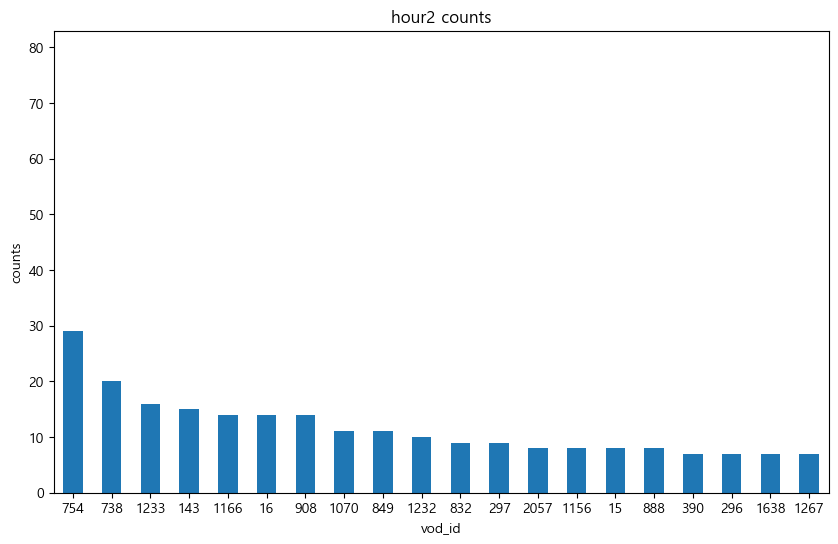

      vod_id  count            rename
0        754     29             최강배달꾼
474      738     20             하늘의인연
822     1233     16           천원짜리변호사
1126     143     15             심야괴담회
1518    1166     14             연인파트1
2148      16     14            TV동물농장
2505     908     14              천고결진
2732    1070     11               장야2
2841     849     11           암련,귤생회남
2953    1232     10  경경아심:두근두근내마음을들어봐
3081     832      9            조선의사랑꾼
3175     297      9           그것이알고싶다
3435    2057      8             비공식작전
3683    1156      8     소방서옆경찰서그리고국과수
4119      15      8          신상출시편스토랑
4243     888      8     경이로운소문2:카운터펀치
4511     390      7          응답하라1988
4665     296      7               런닝맨
5290    1638      7             유리미인살
5459    1267      7             러브포세일


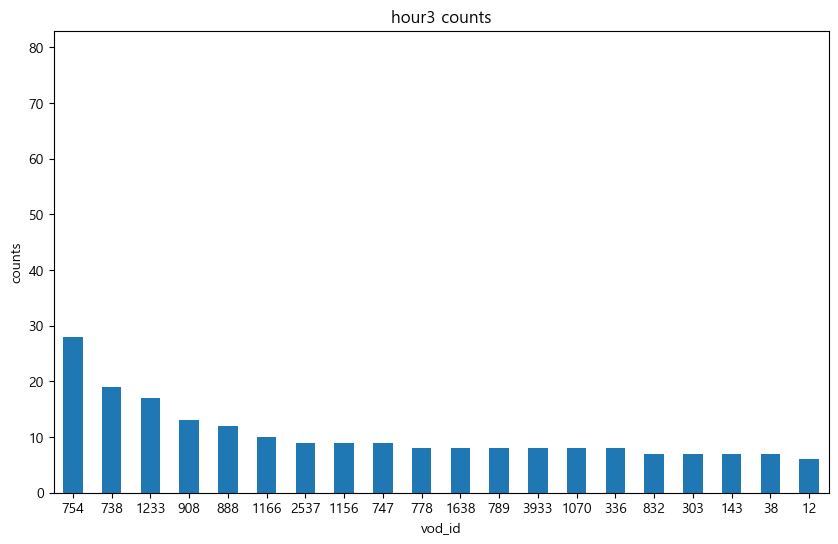

      vod_id  count         rename
0        754     28          최강배달꾼
474      738     19          하늘의인연
822     1233     17        천원짜리변호사
1126     908     13           천고결진
1353     888     12  경이로운소문2:카운터펀치
1621    1166     10          연인파트1
2251    2537      9          범죄도시3
2834    1156      9  소방서옆경찰서그리고국과수
3270     747      9       진짜가나타났다!
3418     778      8      구소한야난너의온도
3596    1638      8          유리미인살
3765     789      8         사랑의불시착
3936    3933      8            무뢰한
3984    1070      8            장야2
4093     336      8       낭만닥터김사부3
4317     832      7         조선의사랑꾼
4411     303      7             호심
4574     143      7          심야괴담회
4966      38      7         미운우리새끼
5238      12      6           신랑수업


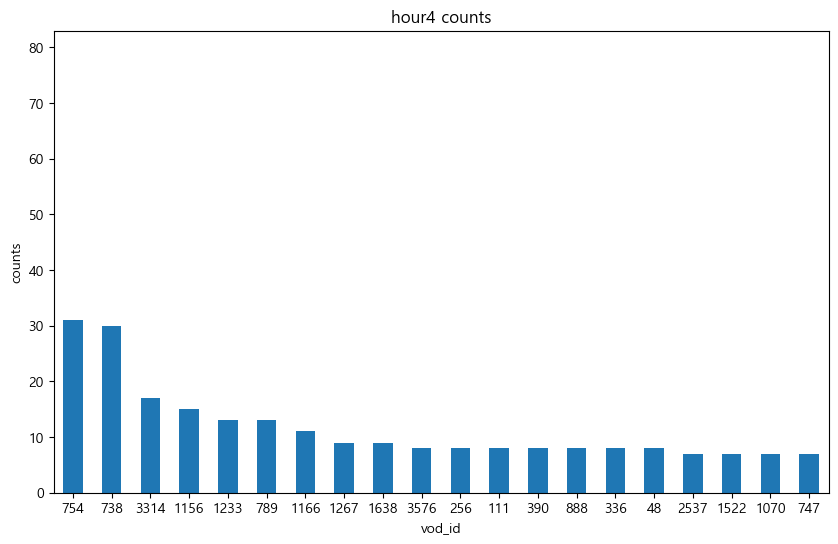

      vod_id  count         rename
0        754     31          최강배달꾼
474      738     30          하늘의인연
822     3314     17       초대:스와핑데이
1012    1156     15  소방서옆경찰서그리고국과수
1448    1233     13        천원짜리변호사
1752     789     13         사랑의불시착
1923    1166     11          연인파트1
2553    1267      9          러브포세일
2919    1638      9          유리미인살
3088    3576      8           해피엔드
3375     256      8        골때리는그녀들
3550     111      8       신발벗고돌싱포맨
3724     390      8       응답하라1988
3878     888      8  경이로운소문2:카운터펀치
4146     336      8       낭만닥터김사부3
4370      48      8           야인시대
4480    2537      7          범죄도시3
5063    1522      7            창란결
5111    1070      7            장야2
5220     747      7       진짜가나타났다!


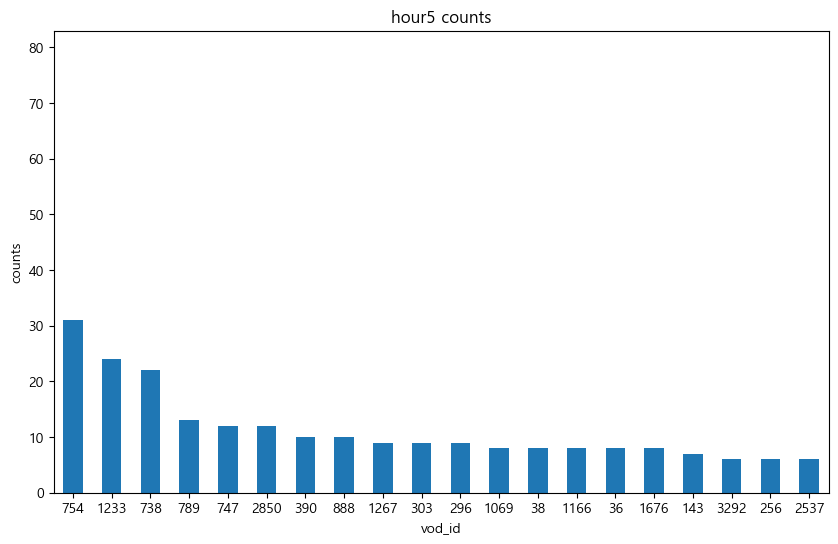

      vod_id  count         rename
0        754     31          최강배달꾼
474     1233     24        천원짜리변호사
778      738     22          하늘의인연
1126     789     13         사랑의불시착
1297     747     12       진짜가나타났다!
1445    2850     12             은교
1550     390     10       응답하라1988
1704     888     10  경이로운소문2:카운터펀치
1972    1267      9          러브포세일
2338     303      9             호심
2501     296      9            런닝맨
3126    1069      8          조선총잡이
3182      38      8         미운우리새끼
3454    1166      8          연인파트1
4084      36      8         개는훌륭하다
4271    1676      8          러브이세벨
4421     143      7          심야괴담회
4813    3292      6     성감치료거시기처방전
4829     256      6        골때리는그녀들
5004    2537      6          범죄도시3


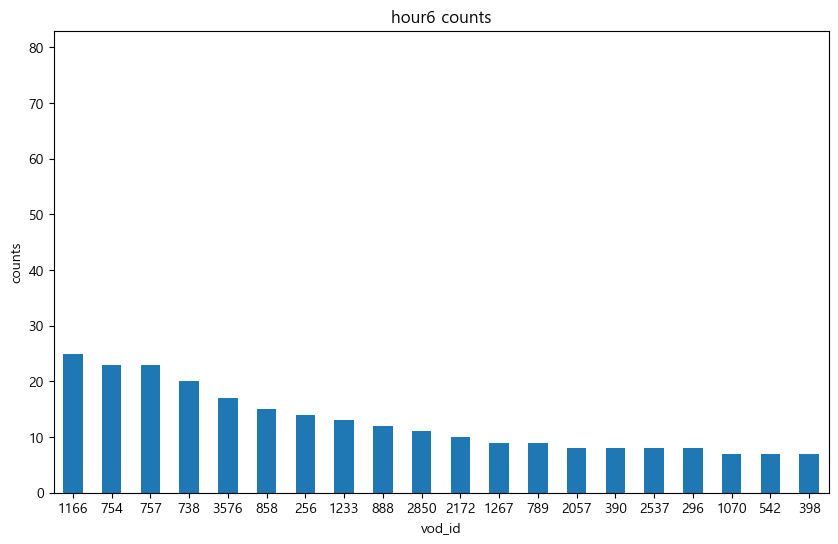

      vod_id  count         rename
0       1166     25          연인파트1
630      754     23          최강배달꾼
1104     757     23            각시탈
1197     738     20          하늘의인연
1545    3576     17           해피엔드
1832     858     15   연희공략:건륭황제의여인
1996     256     14        골때리는그녀들
2171    1233     13        천원짜리변호사
2475     888     12  경이로운소문2:카운터펀치
2743    2850     11             은교
2848    2172     10         후궁제왕의첩
3028    1267      9          러브포세일
3394     789      9         사랑의불시착
3565    2057      8          비공식작전
3813     390      8       응답하라1988
3967    2537      8          범죄도시3
4550     296      8            런닝맨
5175    1070      7            장야2
5284     542      7           인간극장
5436     398      7         경이로운소문


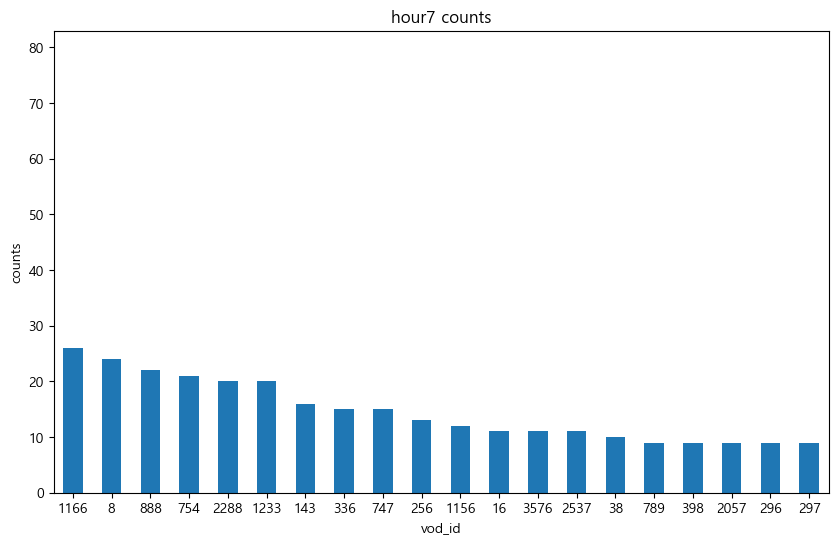

      vod_id  count         rename
0       1166     26          연인파트1
630        8     24  꼬리에꼬리를무는그날이야기
1141     888     22  경이로운소문2:카운터펀치
1409     754     21          최강배달꾼
1883    2288     20           엘리멘탈
2217    1233     20        천원짜리변호사
2521     143     16          심야괴담회
2913     336     15       낭만닥터김사부3
3137     747     15       진짜가나타났다!
3285     256     13        골때리는그녀들
3460    1156     12  소방서옆경찰서그리고국과수
3896      16     11         TV동물농장
4253    3576     11           해피엔드
4540    2537     11          범죄도시3
5123      38     10         미운우리새끼
5395     789      9         사랑의불시착
5566     398      9         경이로운소문
5733    2057      9          비공식작전
5981     296      9            런닝맨
6606     297      9        그것이알고싶다


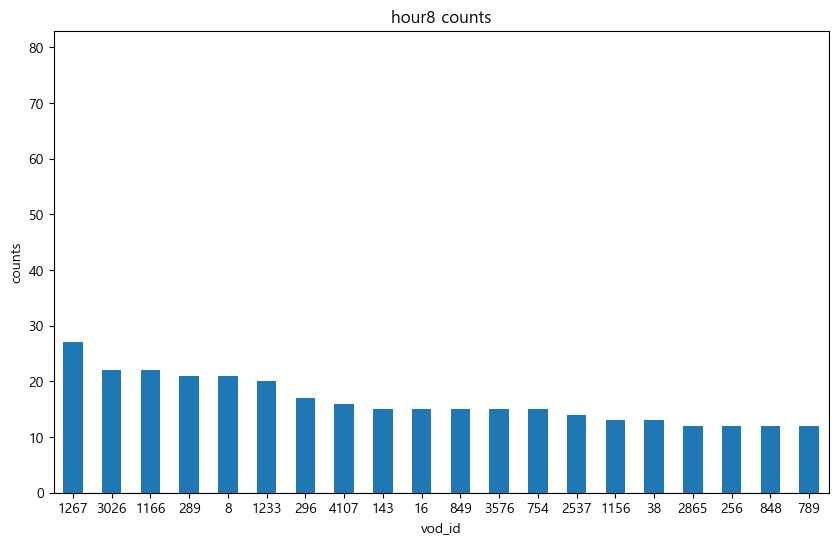

      vod_id  count         rename
0       1267     27          러브포세일
366     3026     22          실화탐사대
464     1166     22          연인파트1
1094     289     21     오은영리포트결혼지옥
1223       8     21  꼬리에꼬리를무는그날이야기
1734    1233     20        천원짜리변호사
2038     296     17            런닝맨
2663    4107     16       더복서:격투의신
2690     143     15          심야괴담회
3082      16     15         TV동물농장
3439     849     15        암련,귤생회남
3551    3576     15           해피엔드
3838     754     15          최강배달꾼
4312    2537     14          범죄도시3
4895    1156     13  소방서옆경찰서그리고국과수
5331      38     13         미운우리새끼
5603    2865     12             밀수
5904     256     12        골때리는그녀들
6079     848     12        뽀로로인기동요
6137     789     12         사랑의불시착


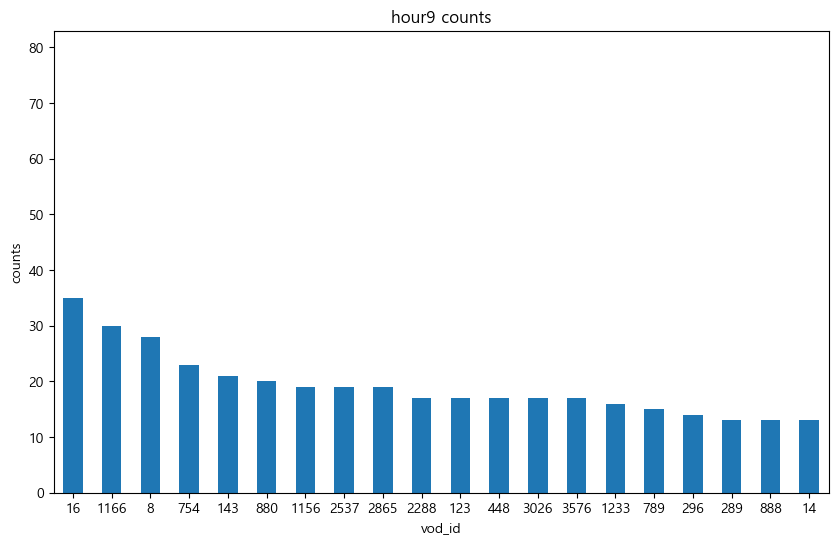

      vod_id  count         rename
0         16     35         TV동물농장
357     1166     30          연인파트1
987        8     28  꼬리에꼬리를무는그날이야기
1498     754     23          최강배달꾼
1972     143     21          심야괴담회
2364     880     20     타요의씽씽극장동요2
2422    1156     19  소방서옆경찰서그리고국과수
2858    2537     19          범죄도시3
3441    2865     19             밀수
3742    2288     17           엘리멘탈
4076     123     17         불타는장미단
4239     448     17           홍김동전
4348    3026     17          실화탐사대
4446    3576     17           해피엔드
4733    1233     16        천원짜리변호사
5037     789     15         사랑의불시착
5208     296     14            런닝맨
5833     289     13     오은영리포트결혼지옥
5962     888     13  경이로운소문2:카운터펀치
6230      14     13     동상이몽2너는내운명


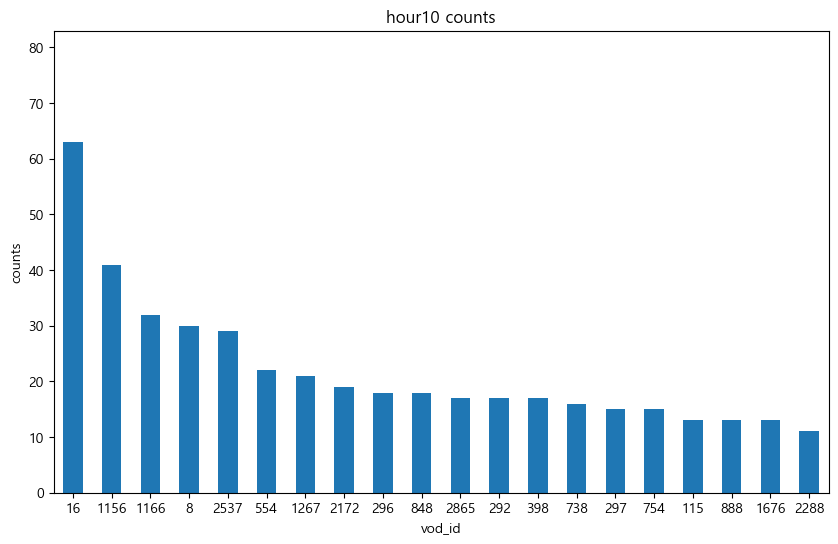

      vod_id  count         rename
0         16     63         TV동물농장
357     1156     41  소방서옆경찰서그리고국과수
793     1166     32          연인파트1
1423       8     30  꼬리에꼬리를무는그날이야기
1934    2537     29          범죄도시3
2517     554     22          영상앨범산
2553    1267     21          러브포세일
2919    2172     19         후궁제왕의첩
3099     296     18            런닝맨
3724     848     18        뽀로로인기동요
3782    2865     17             밀수
4083     292     17         놀면뭐하니?
4221     398     17         경이로운소문
4388     738     16          하늘의인연
4736     297     15        그것이알고싶다
4996     754     15          최강배달꾼
5470     115     13            청설루
5523     888     13  경이로운소문2:카운터펀치
5791    1676     13          러브이세벨
5941    2288     11           엘리멘탈


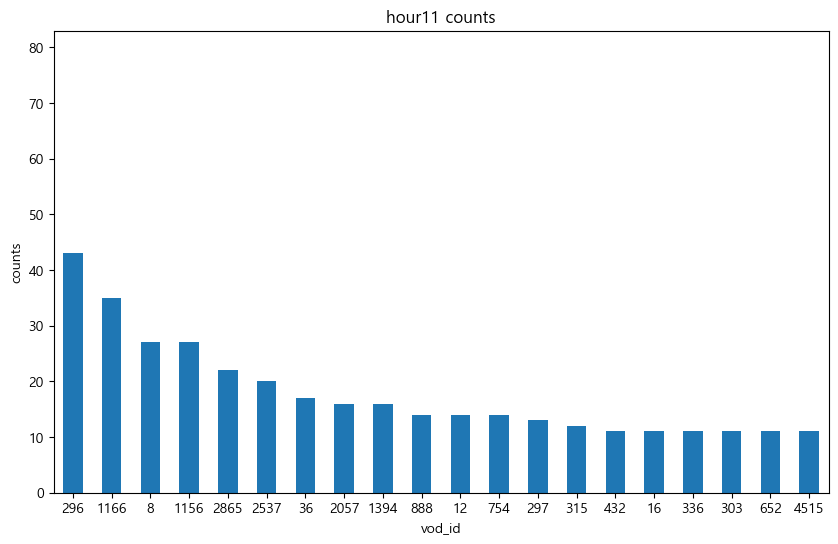

      vod_id  count         rename
0        296     43            런닝맨
625     1166     35          연인파트1
1255       8     27  꼬리에꼬리를무는그날이야기
1766    1156     27  소방서옆경찰서그리고국과수
2202    2865     22             밀수
2503    2537     20          범죄도시3
3086      36     17         개는훌륭하다
3273    2057     16          비공식작전
3521    1394     16           차시천하
3593     888     14  경이로운소문2:카운터펀치
3861      12     14           신랑수업
3988     754     14          최강배달꾼
4462     297     13        그것이알고싶다
4722     315     12         TV소설은희
4873     432     11          나혼자산다
5114      16     11         TV동물농장
5471     336     11       낭만닥터김사부3
5695     303     11             호심
5858     652     11            존윅4
6046    4515     11           상류사회


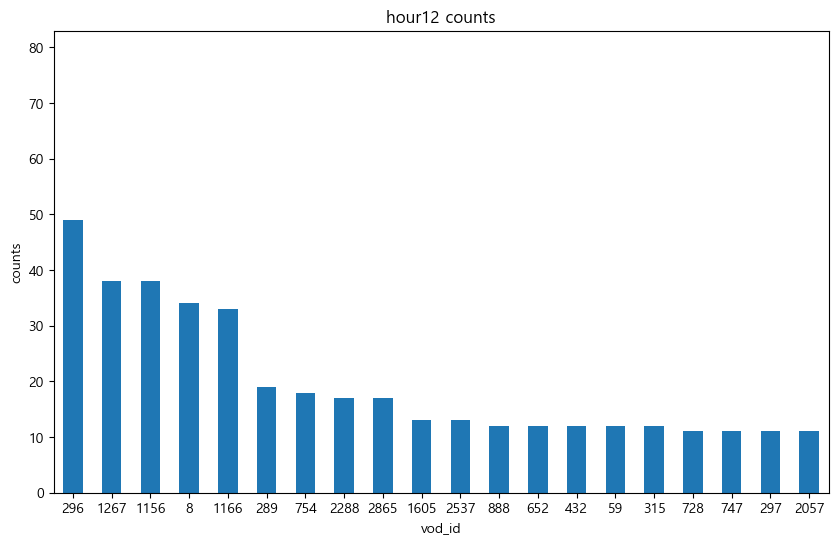

      vod_id  count         rename
0        296     49            런닝맨
625     1267     38          러브포세일
991     1156     38  소방서옆경찰서그리고국과수
1427       8     34  꼬리에꼬리를무는그날이야기
1938    1166     33          연인파트1
2568     289     19     오은영리포트결혼지옥
2697     754     18          최강배달꾼
3171    2288     17           엘리멘탈
3505    2865     17             밀수
3806    1605     13       런민기TV시즌2
3824    2537     13          범죄도시3
4407     888     12  경이로운소문2:카운터펀치
4675     652     12            존윅4
4863     432     12          나혼자산다
5104      59     12       슈퍼맨이돌아왔다
5128     315     12         TV소설은희
5279     728     11          가면의여왕
5328     747     11       진짜가나타났다!
5476     297     11        그것이알고싶다
5736    2057     11          비공식작전


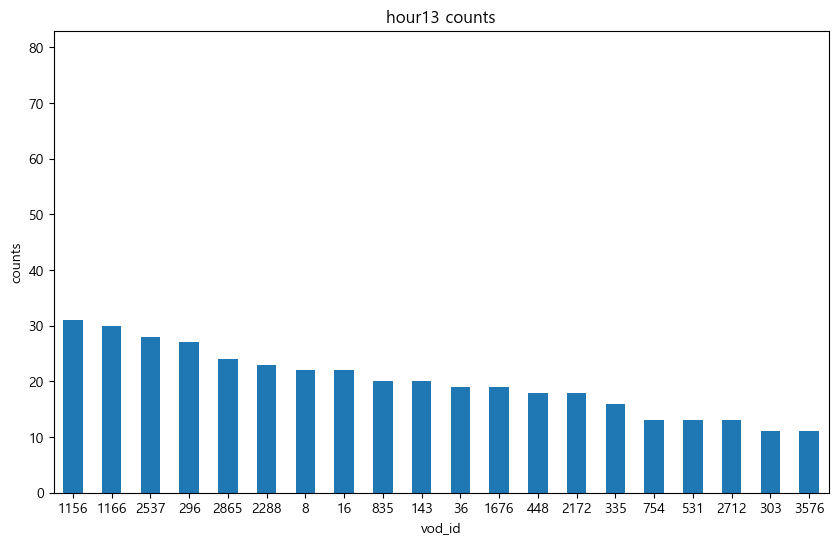

      vod_id  count         rename
0       1156     31  소방서옆경찰서그리고국과수
436     1166     30          연인파트1
1066    2537     28          범죄도시3
1649     296     27            런닝맨
2274    2865     24             밀수
2575    2288     23           엘리멘탈
2909       8     22  꼬리에꼬리를무는그날이야기
3420      16     22         TV동물농장
3777     835     20         국민사형투표
3946     143     20          심야괴담회
4338      36     19         개는훌륭하다
4525    1676     19          러브이세벨
4675     448     18           홍김동전
4784    2172     18         후궁제왕의첩
4964     335     16          미스터로또
5157     754     13          최강배달꾼
5631     531     13      과학수사대스모킹건
5768    2712     13     웨이트:감각에눈뜰때
5846     303     11             호심
6009    3576     11           해피엔드


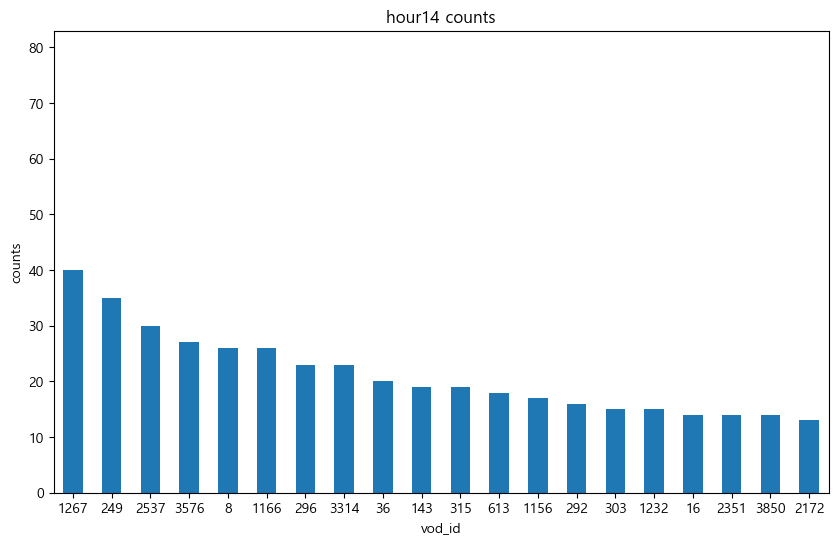

      vod_id  count            rename
0       1267     40             러브포세일
366      249     35            구해줘!홈즈
514     2537     30             범죄도시3
1097    3576     27              해피엔드
1384       8     26     꼬리에꼬리를무는그날이야기
1895    1166     26             연인파트1
2525     296     23               런닝맨
3150    3314     23          초대:스와핑데이
3340      36     20            개는훌륭하다
3527     143     19             심야괴담회
3919     315     19            TV소설은희
4070     613     18               멍뭉이
4233    1156     17     소방서옆경찰서그리고국과수
4669     292     16            놀면뭐하니?
4807     303     15                호심
4970    1232     15  경경아심:두근두근내마음을들어봐
5098      16     14            TV동물농장
5455    2351     14     애쉬래드2:황금성을찾아서
5500    3850     14          존윅3:파라벨룸
5649    2172     13            후궁제왕의첩


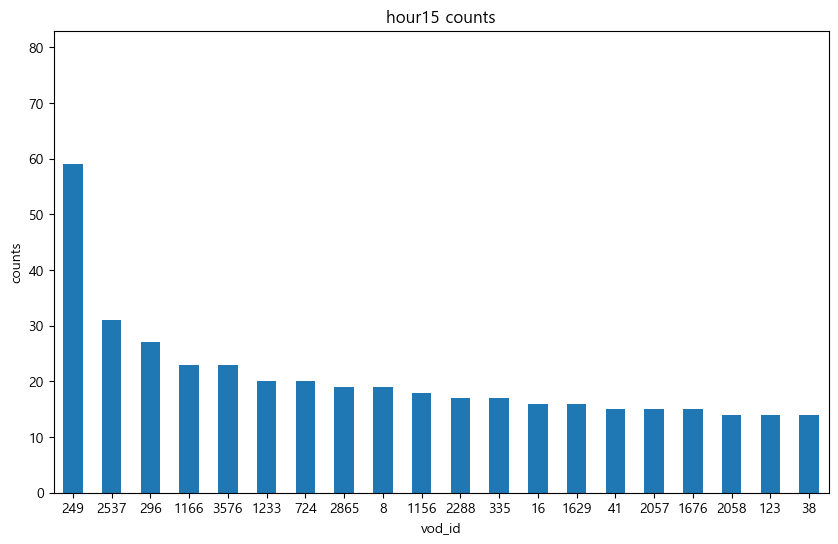

      vod_id  count         rename
0        249     59         구해줘!홈즈
148     2537     31          범죄도시3
731      296     27            런닝맨
1356    1166     23          연인파트1
1986    3576     23           해피엔드
2273    1233     20        천원짜리변호사
2577     724     20         뿌리깊은나무
2640    2865     19             밀수
2941       8     19  꼬리에꼬리를무는그날이야기
3452    1156     18  소방서옆경찰서그리고국과수
3888    2288     17           엘리멘탈
4222     335     17          미스터로또
4415      16     16         TV동물농장
4772    1629     16          원초적본능
4886      41     15      짱구는못말려22기
4922    2057     15          비공식작전
5170    1676     15          러브이세벨
5320    2058     14            귀공자
5509     123     14         불타는장미단
5672      38     14         미운우리새끼


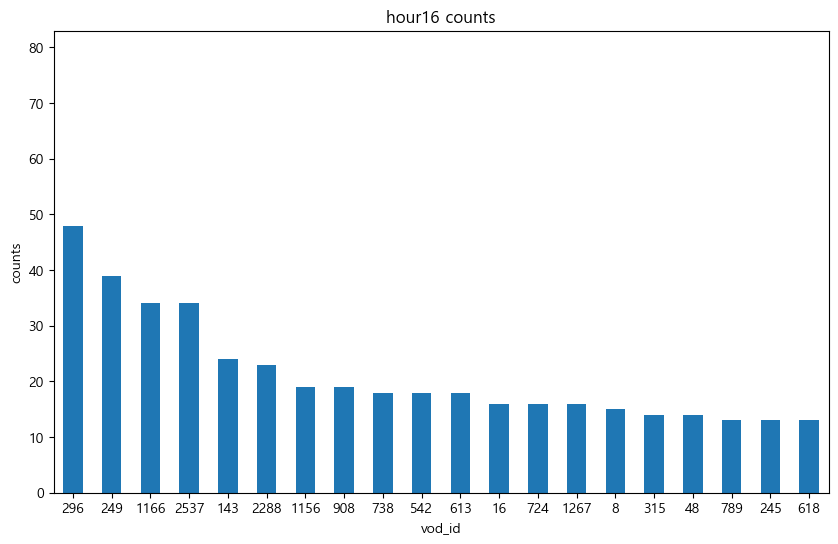

      vod_id  count         rename
0        296     48            런닝맨
625      249     39         구해줘!홈즈
773     1166     34          연인파트1
1403    2537     34          범죄도시3
1986     143     24          심야괴담회
2378    2288     23           엘리멘탈
2712    1156     19  소방서옆경찰서그리고국과수
3148     908     19           천고결진
3375     738     18          하늘의인연
3723     542     18           인간극장
3875     613     18            멍뭉이
4038      16     16         TV동물농장
4395     724     16         뿌리깊은나무
4458    1267     16          러브포세일
4824       8     15  꼬리에꼬리를무는그날이야기
5335     315     14         TV소설은희
5486      48     14           야인시대
5596     789     13         사랑의불시착
5767     245     13        1박2일시즌4
5854     618     13            올빼미


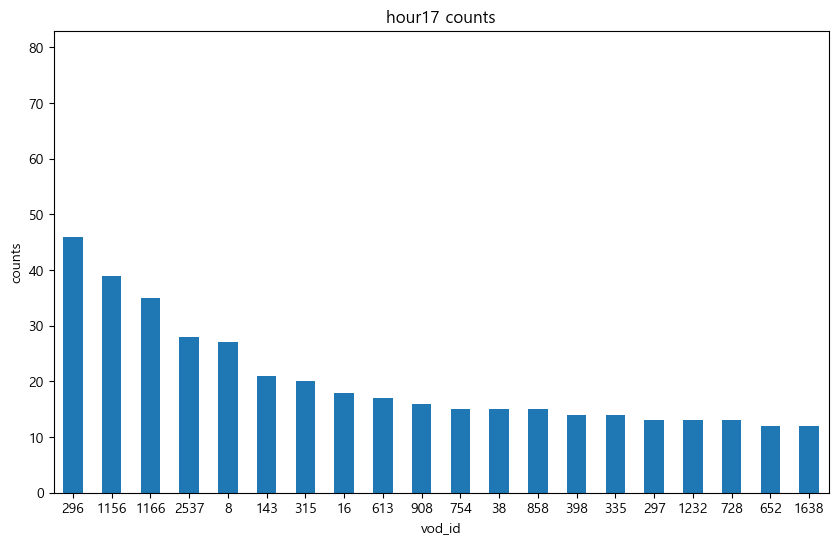

      vod_id  count            rename
0        296     46               런닝맨
625     1156     39     소방서옆경찰서그리고국과수
1061    1166     35             연인파트1
1691    2537     28             범죄도시3
2274       8     27     꼬리에꼬리를무는그날이야기
2785     143     21             심야괴담회
3177     315     20            TV소설은희
3328      16     18            TV동물농장
3685     613     17               멍뭉이
3848     908     16              천고결진
4075     754     15             최강배달꾼
4549      38     15            미운우리새끼
4821     858     15      연희공략:건륭황제의여인
4985     398     14            경이로운소문
5152     335     14             미스터로또
5345     297     13           그것이알고싶다
5605    1232     13  경경아심:두근두근내마음을들어봐
5733     728     13             가면의여왕
5782     652     12               존윅4
5970    1638     12             유리미인살


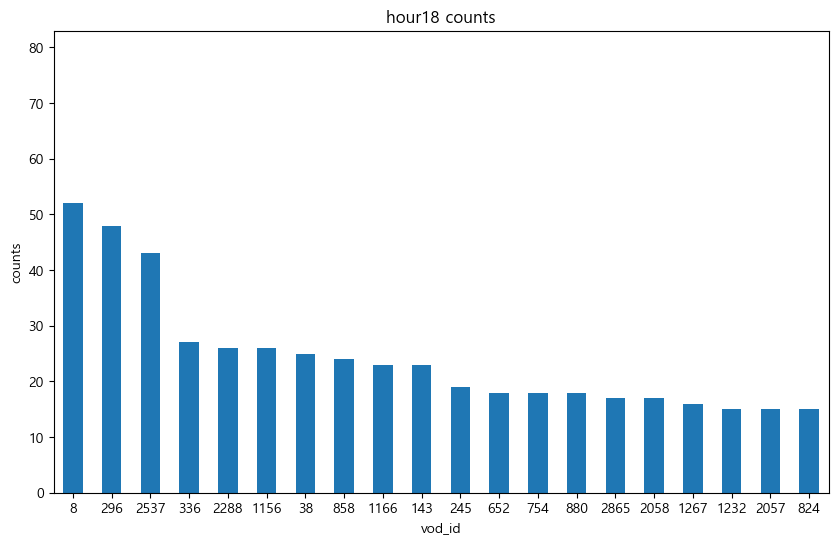

      vod_id  count            rename
0          8     52     꼬리에꼬리를무는그날이야기
511      296     48               런닝맨
1136    2537     43             범죄도시3
1719     336     27          낭만닥터김사부3
1943    2288     26              엘리멘탈
2277    1156     26     소방서옆경찰서그리고국과수
2713      38     25            미운우리새끼
2985     858     24      연희공략:건륭황제의여인
3149    1166     23             연인파트1
3779     143     23             심야괴담회
4171     245     19           1박2일시즌4
4258     652     18               존윅4
4446     754     18             최강배달꾼
4920     880     18        타요의씽씽극장동요2
4978    2865     17                밀수
5279    2058     17               귀공자
5468    1267     16             러브포세일
5834    1232     15  경경아심:두근두근내마음을들어봐
5962    2057     15             비공식작전
6210     824     15           용주전기무간도


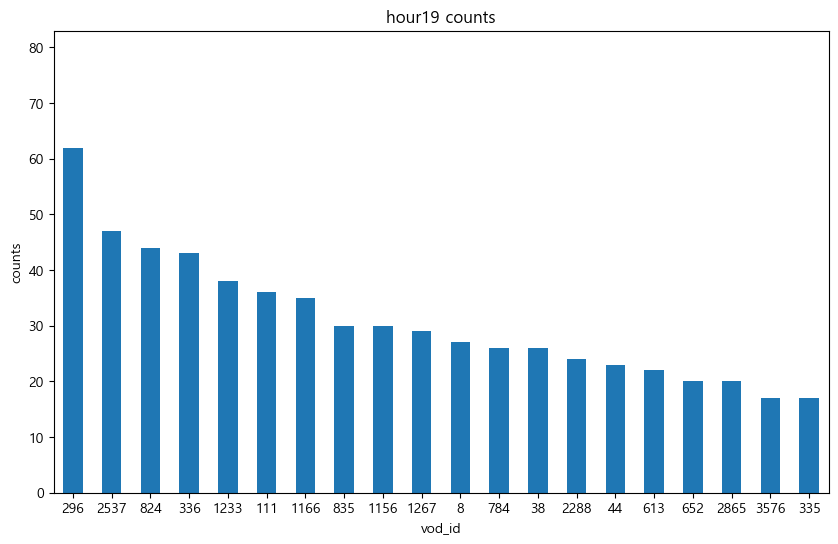

      vod_id  count         rename
0        296     62            런닝맨
625     2537     47          범죄도시3
1208     824     44        용주전기무간도
1365     336     43       낭만닥터김사부3
1589    1233     38        천원짜리변호사
1893     111     36       신발벗고돌싱포맨
2067    1166     35          연인파트1
2697     835     30         국민사형투표
2866    1156     30  소방서옆경찰서그리고국과수
3302    1267     29          러브포세일
3668       8     27  꼬리에꼬리를무는그날이야기
4179     784     26         금이야옥이야
4414      38     26         미운우리새끼
4686    2288     24           엘리멘탈
5020      44     23        전지적참견시점
5175     613     22            멍뭉이
5338     652     20            존윅4
5526    2865     20             밀수
5827    3576     17           해피엔드
6114     335     17          미스터로또


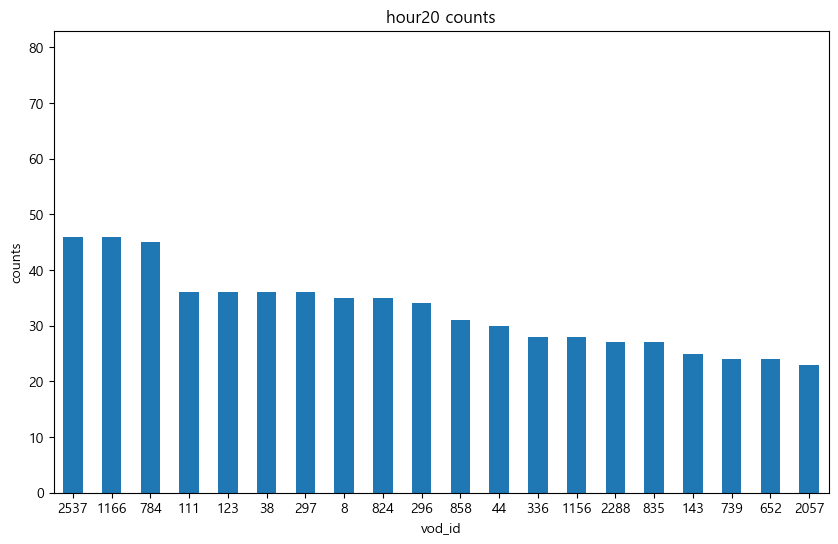

      vod_id  count         rename
0       2537     46          범죄도시3
583     1166     46          연인파트1
1213     784     45         금이야옥이야
1448     111     36       신발벗고돌싱포맨
1622     123     36         불타는장미단
1785      38     36         미운우리새끼
2057     297     36        그것이알고싶다
2317       8     35  꼬리에꼬리를무는그날이야기
2828     824     35        용주전기무간도
2985     296     34            런닝맨
3610     858     31   연희공략:건륭황제의여인
3774      44     30        전지적참견시점
3929     336     28       낭만닥터김사부3
4153    1156     28  소방서옆경찰서그리고국과수
4589    2288     27           엘리멘탈
4923     835     27         국민사형투표
5092     143     25          심야괴담회
5484     739     24         장미꽃필무렵
5586     652     24            존윅4
5774    2057     23          비공식작전


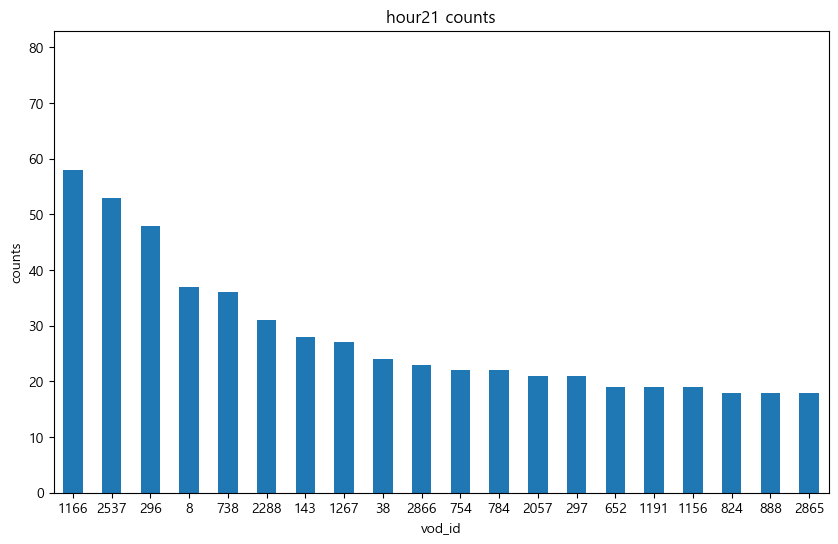

      vod_id  count         rename
0       1166     58          연인파트1
630     2537     53          범죄도시3
1213     296     48            런닝맨
1838       8     37  꼬리에꼬리를무는그날이야기
2349     738     36          하늘의인연
2697    2288     31           엘리멘탈
3031     143     28          심야괴담회
3423    1267     27          러브포세일
3789      38     24         미운우리새끼
4061    2866     23             더문
4184     754     22          최강배달꾼
4658     784     22         금이야옥이야
4893    2057     21          비공식작전
5141     297     21        그것이알고싶다
5401     652     19            존윅4
5589    1191     19        속풀이쇼동치미
5685    1156     19  소방서옆경찰서그리고국과수
6121     824     18        용주전기무간도
6278     888     18  경이로운소문2:카운터펀치
6546    2865     18             밀수


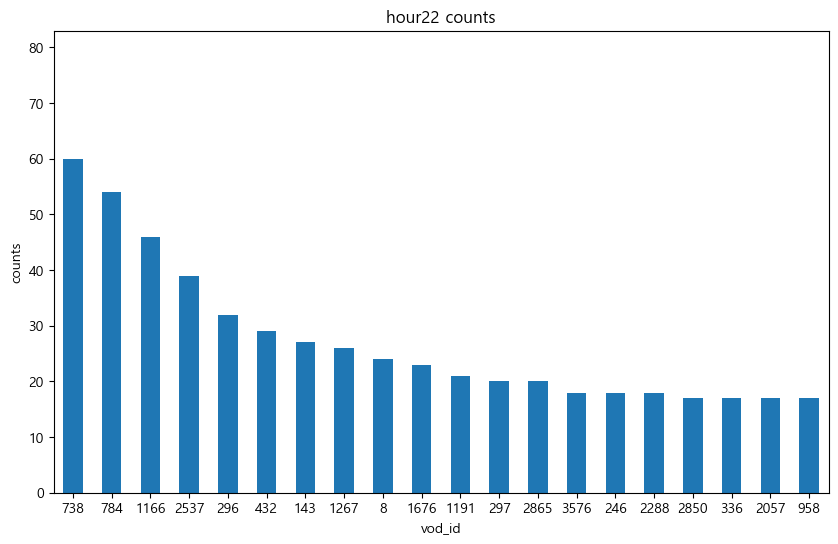

      vod_id  count         rename
0        738     60          하늘의인연
348      784     54         금이야옥이야
583     1166     46          연인파트1
1213    2537     39          범죄도시3
1796     296     32            런닝맨
2421     432     29          나혼자산다
2662     143     27          심야괴담회
3054    1267     26          러브포세일
3420       8     24  꼬리에꼬리를무는그날이야기
3931    1676     23          러브이세벨
4081    1191     21        속풀이쇼동치미
4177     297     20        그것이알고싶다
4437    2865     20             밀수
4738    3576     18           해피엔드
5025     246     18         트롯전국체전
5073    2288     18           엘리멘탈
5407    2850     17             은교
5512     336     17       낭만닥터김사부3
5736    2057     17          비공식작전
5984     958     17        우당탕탕패밀리


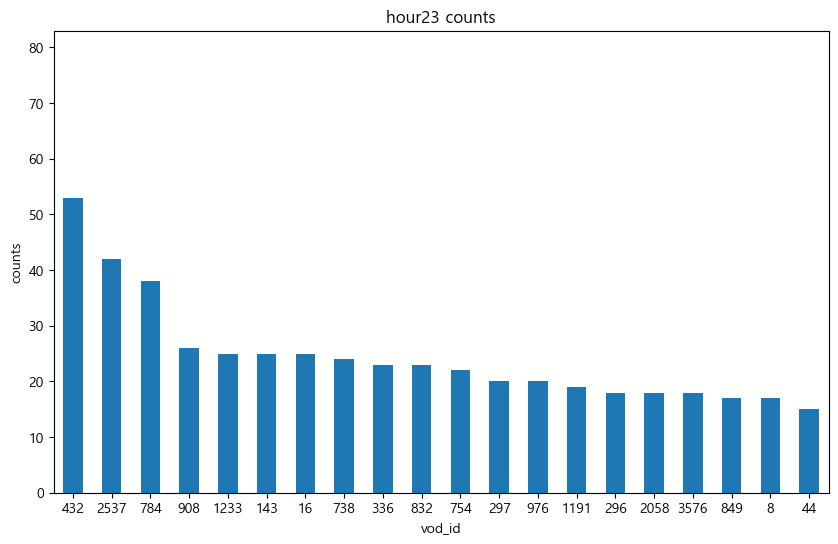

      vod_id  count         rename
0        432     53          나혼자산다
241     2537     42          범죄도시3
824      784     38         금이야옥이야
1059     908     26           천고결진
1286    1233     25        천원짜리변호사
1590     143     25          심야괴담회
1982      16     25         TV동물농장
2339     738     24          하늘의인연
2687     336     23       낭만닥터김사부3
2911     832     23         조선의사랑꾼
3005     754     22          최강배달꾼
3479     297     20        그것이알고싶다
3739     976     20           소녀대인
3858    1191     19        속풀이쇼동치미
3954     296     18            런닝맨
4579    2058     18            귀공자
4768    3576     18           해피엔드
5055     849     17        암련,귤생회남
5167       8     17  꼬리에꼬리를무는그날이야기
5678      44     15        전지적참견시점


In [15]:
max_count = 0
for hour in count_by_hour['hour'].unique():
    total_hour = total[total['hour'] == hour]
    hour_counts = total_hour['vod_id'].value_counts().sort_values(ascending=False)[:20]
    max_count = max(max_count, hour_counts.max())

for hour in count_by_hour['hour'].unique():
    total_hour= total[total['hour']==hour]
    hour_counts = total_hour['vod_id'].value_counts().sort_values(ascending=False)[:20]
    top_20 = hour_counts.reset_index()
    top_20_name = pd.merge(top_20, total[['vod_id', 'rename']], on='vod_id', how='left')
    top_20_name.drop_duplicates(inplace=True)
    plt.figure(figsize=(10,6))
    hour_counts.plot(kind='bar')
    plt.title(f'hour{hour} counts')
    plt.xlabel('vod_id')
    plt.ylabel('counts')
    plt.xticks(rotation=0)
    plt.ylim(0, max_count+20)
    plt.show()
    print(top_20_name)

In [17]:
hour_counts = total_hour['vod_id'].value_counts().sort_values(ascending=False)[:20]

In [18]:
hour_counts

vod_id
432     53
2537    42
784     38
908     26
1233    25
143     25
16      25
738     24
336     23
832     23
754     22
297     20
976     20
1191    19
296     18
2058    18
3576    18
849     17
8       17
44      15
Name: count, dtype: int64

In [19]:
hour_counts = total_hour['vod_id'].value_counts().sort_values(ascending=False)[:20]
top_20 = hour_counts.reset_index()
top_20_name = pd.merge(top_20, total[['vod_id', 'rename']], on='vod_id', how='left')
top_20

,vod_id,count
0,432,53
1,2537,42
2,784,38
3,908,26
4,1233,25
5,143,25
6,16,25
7,738,24
8,336,23
9,832,23


In [20]:
top_20_name.drop_duplicates(inplace = True)
top_20_name

,vod_id,count,rename
0,432,53,나혼자산다
241,2537,42,범죄도시3
824,784,38,금이야옥이야
1059,908,26,천고결진
1286,1233,25,천원짜리변호사
1590,143,25,심야괴담회
1982,16,25,TV동물농장
2339,738,24,하늘의인연
2687,336,23,낭만닥터김사부3
2911,832,23,조선의사랑꾼


평일/주말(공휴일) 구분

In [21]:
# YYYY-MM-DD 열 만들기
total['log_date'] = pd.to_datetime(total['log_dt'].dt.date)
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16,2023-08-12
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20,2023-08-16
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19,2023-08-29
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13,2023-08-13
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9,2023-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,2023-09-30
21123,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,2023-09-30
21124,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,2023-09-30
21125,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,2023-09-30


In [22]:
total[total['log_date'] == '2023-08-15']

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date
21,65696000,과학수사대 스모킹 건,TV 시사/교양,기타,52.0,"[천사의 얼굴을 한 악마? - 엄 여인 잔혹 미스터리] 역대급 사이코패스 성향에다,...","안현모,이유리,유성호,김복준,표창원",52,2023-08-15 12:38:18,TV프로그램,과학수사대스모킹건,531,12,2023-08-15
27,64659000,과학수사대 스모킹 건,TV 시사/교양,기타,0.1,"[가면 쓴 살인마의 최후 - 독신녀 토막 살인 사건] 2003년 3월 16일, 배수...","안현모,이유리,유성호,김복준,표창원",53,2023-08-15 10:43:16,TV프로그램,과학수사대스모킹건,531,10,2023-08-15
28,65696000,과학수사대 스모킹 건,TV 시사/교양,기타,53.0,"[가면 쓴 살인마의 최후 - 독신녀 토막 살인 사건] 2003년 3월 16일, 배수...","안현모,이유리,유성호,김복준,표창원",53,2023-08-15 16:16:03,TV프로그램,과학수사대스모킹건,531,16,2023-08-15
29,64659000,과학수사대 스모킹 건,TV 시사/교양,기타,53.0,"[가면 쓴 살인마의 최후 - 독신녀 토막 살인 사건] 2003년 3월 16일, 배수...","안현모,이유리,유성호,김복준,표창원",53,2023-08-15 10:55:42,TV프로그램,과학수사대스모킹건,531,10,2023-08-15
74,65696000,과학수사대 스모킹 건,TV 시사/교양,기타,53.0,[때리긴 했어도 죽이진 않았어요 - 다섯 살 딸 실종 살인 사건] 2017년 12월...,"안현모,이유리,유성호,김복준,표창원",53,2023-08-15 14:28:24,TV프로그램,과학수사대스모킹건,531,14,2023-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,65443000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,NaN,"외톨이가 보낸 소포 - 버지니아 공대 총기난사. 2007년 4월 15일, 미국의 한...","장도연,장현성,장성규",73,2023-08-15 18:54:51,TV프로그램,꼬리에꼬리를무는그날이야기,8,18,2023-08-15
10765,66431000,주치의 배송 서비스 가족을 부탁해,TV 시사/교양,인물/다큐,NaN,가족을 부탁해 여섯 번째 마을은 경기도 연천군! 이번에 찾아간 주인공은? 남편을 먼...,"임채무,이문식,김도연,오승아,장지건,이태훈,김형민",45,2023-08-15 13:48:57,TV프로그램,주치의배송서비스가족을부탁해,748,13,2023-08-15
10766,66431000,주치의 배송 서비스 가족을 부탁해,TV 시사/교양,인물/다큐,NaN,가족을 부탁해 여섯 번째 마을은 경기도 연천군! 이번에 찾아간 주인공은? 남편을 먼...,"임채무,이문식,김도연,오승아,장지건,이태훈,김형민",45,2023-08-15 13:48:07,TV프로그램,주치의배송서비스가족을부탁해,748,13,2023-08-15
10781,60593000,한문철의 블랙박스 리뷰,TV 시사/교양,인물/다큐,NaN,인도네시아 최초 K-POP 아이돌! 시크릿넘버의 멤버 디타가 찾아왔다?? 한블리 해...,"한문철,이수근,규현,한보름,수빈,기욤 패트리",83,2023-08-15 10:30:12,TV프로그램,한문철의블랙박스리뷰,861,10,2023-08-15


In [23]:
# api 이용하여 한국 공휴일 정보 가져옴
import requests
from urllib import parse
from bs4 import BeautifulSoup
from datetime import datetime

In [24]:
api_key_utf8 = '8rnsD4jDA580O81rnMuiKsWHB9HCb7O9MNFmEQfG6rPCfTbr0IN%2F7hl3tSBrvvaVHUaAHUDpoT2ct6Whj6Bl3g%3D%3D'
api_key_decode = '8rnsD4jDA580O81rnMuiKsWHB9HCb7O9MNFmEQfG6rPCfTbr0IN/7hl3tSBrvvaVHUaAHUDpoT2ct6Whj6Bl3g=='
solYear = 2023

url_holiday = f'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo?solYear={solYear}&ServiceKey={api_key_decode}&numOfRows=100'

response = requests.get(url_holiday)
xml = BeautifulSoup(response.text, 'lxml')
xml

C:\Users\USER\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><html><body><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><items><item><datekind>01</datekind><datename>1월1일</datename><isholiday>Y</isholiday><locdate>20230101</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>설날</datename><isholiday>Y</isholiday><locdate>20230121</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>설날</datename><isholiday>Y</isholiday><locdate>20230122</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>설날</datename><isholiday>Y</isholiday><locdate>20230123</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>대체공휴일</datename><isholiday>Y</isholiday><locdate>20230124</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>삼일절</datename><isholiday>Y</isholiday><locdate>20230301</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>어린이날</datename><isholiday>Y</isholiday><locdate>20230505<

In [25]:
items = xml.find('items')
items

<items><item><datekind>01</datekind><datename>1월1일</datename><isholiday>Y</isholiday><locdate>20230101</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>설날</datename><isholiday>Y</isholiday><locdate>20230121</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>설날</datename><isholiday>Y</isholiday><locdate>20230122</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>설날</datename><isholiday>Y</isholiday><locdate>20230123</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>대체공휴일</datename><isholiday>Y</isholiday><locdate>20230124</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>삼일절</datename><isholiday>Y</isholiday><locdate>20230301</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>어린이날</datename><isholiday>Y</isholiday><locdate>20230505</locdate><seq>1</seq></item><item><datekind>01</datekind><datename>부처님오신날</datename><isholiday>Y</isholiday><locdate>20230527</locdate><seq>1</seq></item><item

In [26]:
holidays = []
for item in items:
    date = datetime.strptime(item.find('locdate').text.strip(), '%Y%m%d')
    holidays.append(pd.to_datetime(date.strftime('%Y-%m-%d')))

In [27]:
def classify_date(row):
    if row in holidays or row.weekday() >=5:
        return '휴일'
    else:
        return '평일'
    
total['date_type'] = total['log_date'].apply(classify_date)
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16,2023-08-12,휴일
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20,2023-08-16,평일
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19,2023-08-29,평일
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13,2023-08-13,휴일
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9,2023-08-04,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,2023-09-30,휴일
21123,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,2023-09-30,휴일
21124,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,2023-09-30,휴일
21125,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,2023-09-30,휴일


In [28]:
total[total['log_date'] == '2023-08-15']

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type
21,65696000,과학수사대 스모킹 건,TV 시사/교양,기타,52.0,"[천사의 얼굴을 한 악마? - 엄 여인 잔혹 미스터리] 역대급 사이코패스 성향에다,...","안현모,이유리,유성호,김복준,표창원",52,2023-08-15 12:38:18,TV프로그램,과학수사대스모킹건,531,12,2023-08-15,휴일
27,64659000,과학수사대 스모킹 건,TV 시사/교양,기타,0.1,"[가면 쓴 살인마의 최후 - 독신녀 토막 살인 사건] 2003년 3월 16일, 배수...","안현모,이유리,유성호,김복준,표창원",53,2023-08-15 10:43:16,TV프로그램,과학수사대스모킹건,531,10,2023-08-15,휴일
28,65696000,과학수사대 스모킹 건,TV 시사/교양,기타,53.0,"[가면 쓴 살인마의 최후 - 독신녀 토막 살인 사건] 2003년 3월 16일, 배수...","안현모,이유리,유성호,김복준,표창원",53,2023-08-15 16:16:03,TV프로그램,과학수사대스모킹건,531,16,2023-08-15,휴일
29,64659000,과학수사대 스모킹 건,TV 시사/교양,기타,53.0,"[가면 쓴 살인마의 최후 - 독신녀 토막 살인 사건] 2003년 3월 16일, 배수...","안현모,이유리,유성호,김복준,표창원",53,2023-08-15 10:55:42,TV프로그램,과학수사대스모킹건,531,10,2023-08-15,휴일
74,65696000,과학수사대 스모킹 건,TV 시사/교양,기타,53.0,[때리긴 했어도 죽이진 않았어요 - 다섯 살 딸 실종 살인 사건] 2017년 12월...,"안현모,이유리,유성호,김복준,표창원",53,2023-08-15 14:28:24,TV프로그램,과학수사대스모킹건,531,14,2023-08-15,휴일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,65443000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,NaN,"외톨이가 보낸 소포 - 버지니아 공대 총기난사. 2007년 4월 15일, 미국의 한...","장도연,장현성,장성규",73,2023-08-15 18:54:51,TV프로그램,꼬리에꼬리를무는그날이야기,8,18,2023-08-15,휴일
10765,66431000,주치의 배송 서비스 가족을 부탁해,TV 시사/교양,인물/다큐,NaN,가족을 부탁해 여섯 번째 마을은 경기도 연천군! 이번에 찾아간 주인공은? 남편을 먼...,"임채무,이문식,김도연,오승아,장지건,이태훈,김형민",45,2023-08-15 13:48:57,TV프로그램,주치의배송서비스가족을부탁해,748,13,2023-08-15,휴일
10766,66431000,주치의 배송 서비스 가족을 부탁해,TV 시사/교양,인물/다큐,NaN,가족을 부탁해 여섯 번째 마을은 경기도 연천군! 이번에 찾아간 주인공은? 남편을 먼...,"임채무,이문식,김도연,오승아,장지건,이태훈,김형민",45,2023-08-15 13:48:07,TV프로그램,주치의배송서비스가족을부탁해,748,13,2023-08-15,휴일
10781,60593000,한문철의 블랙박스 리뷰,TV 시사/교양,인물/다큐,NaN,인도네시아 최초 K-POP 아이돌! 시크릿넘버의 멤버 디타가 찾아왔다?? 한블리 해...,"한문철,이수근,규현,한보름,수빈,기욤 패트리",83,2023-08-15 10:30:12,TV프로그램,한문철의블랙박스리뷰,861,10,2023-08-15,휴일


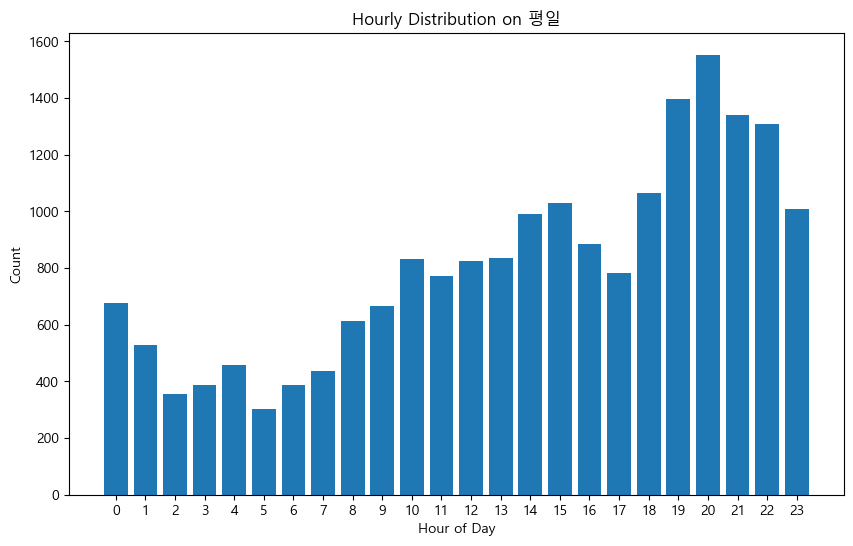

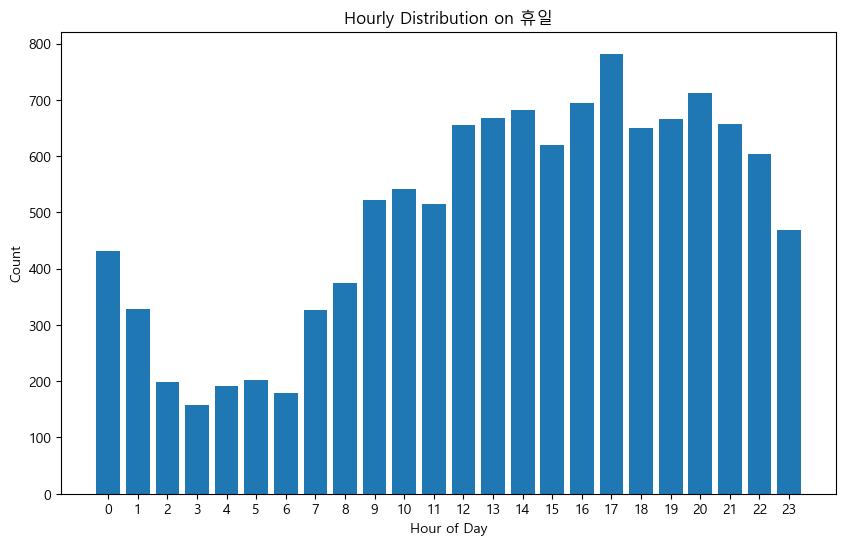

In [29]:
# 시간대별로 그룹화하고 각 day_type 별로 그래프 그리기
for day_type in ['평일', '휴일']:
    subset = total[total['date_type'] == day_type]
    count_per_hour = subset['hour'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(count_per_hour.index, count_per_hour.values)
    plt.title(f'Hourly Distribution on {day_type}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.xticks(range(0, 24))
    plt.show()

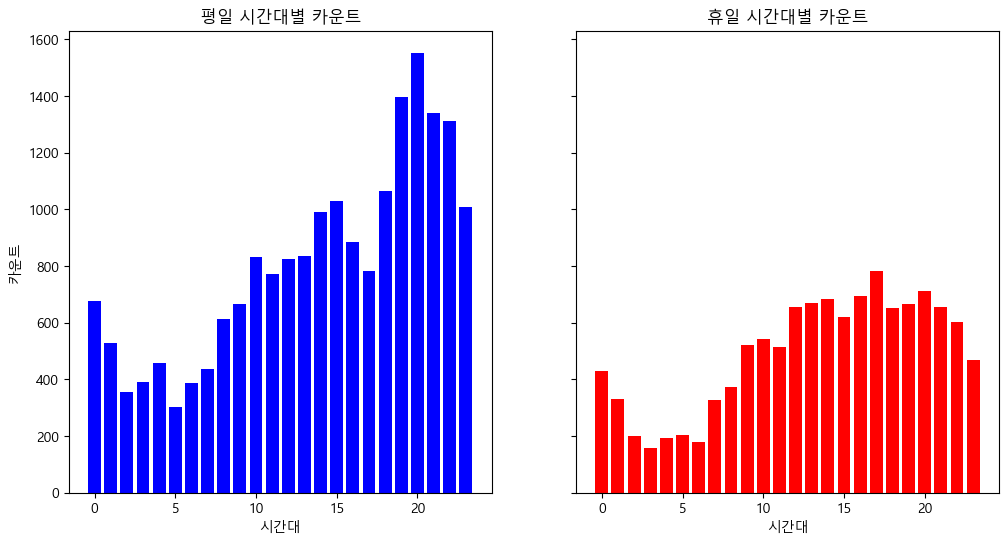

In [30]:
# 평일, 휴일 별로 시청 확인
weekday_counts = total[total['date_type'] == '평일']['hour'].value_counts().sort_index()
holiday_counts = total[total['date_type'] == '휴일']['hour'].value_counts().sort_index()

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)

axes[0].bar(weekday_counts.index, weekday_counts.values, color='blue')
axes[0].set_title('평일 시간대별 카운트')
axes[0].set_xlabel('시간대')
axes[0].set_ylabel('카운트')

# '휴일' 데이터의 막대 그래프
axes[1].bar(holiday_counts.index, holiday_counts.values, color='red')
axes[1].set_title('휴일 시간대별 카운트')
axes[1].set_xlabel('시간대')

# # y축 범위 조정
# max_count = max(weekday_counts.max(), holiday_counts.max())
# axes[0].set_ylim(0, max_count+50)
# axes[1].set_ylim(0, max_count+50)

plt.show()

In [31]:
# 다음날이 휴일인 날과 다음날이 휴일이 아닌 날의 차이 확인
total['next_day'] = total['log_date'].apply(lambda x: x + pd.DateOffset(days=1))
total['next_date_type'] = total['next_day'].apply(classify_date)
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16,2023-08-12,휴일,2023-08-13,휴일
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20,2023-08-16,평일,2023-08-17,평일
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19,2023-08-29,평일,2023-08-30,평일
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13,2023-08-13,휴일,2023-08-14,평일
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9,2023-08-04,평일,2023-08-05,휴일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,2023-09-30,휴일,2023-10-01,휴일
21123,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,2023-09-30,휴일,2023-10-01,휴일
21124,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,2023-09-30,휴일,2023-10-01,휴일
21125,64551000,슈퍼 토끼,키즈,학습,NaN,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,2023-09-30,휴일,2023-10-01,휴일


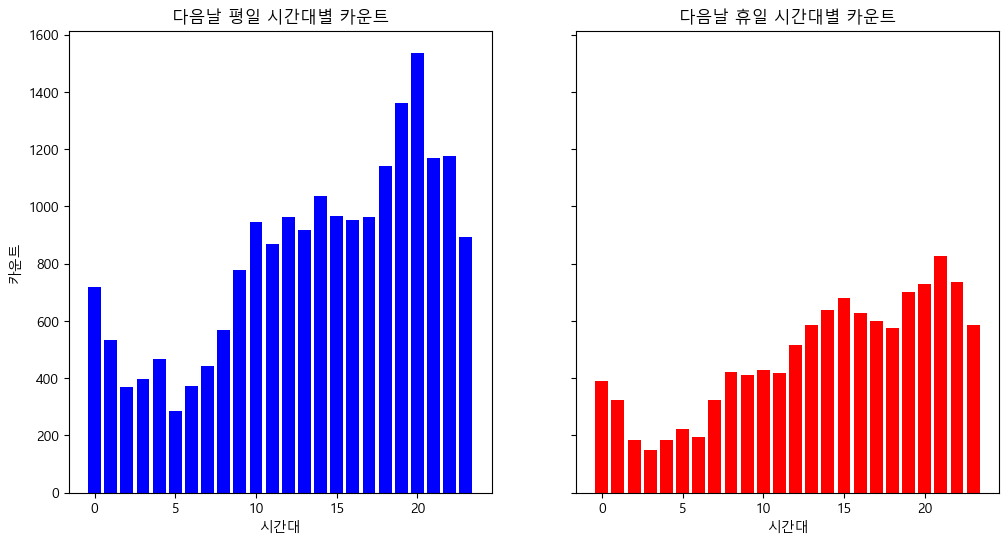

In [32]:
# 평일, 휴일 별로 시청 확인
tomorrow_weekday_counts = total[total['next_date_type'] == '평일']['hour'].value_counts().sort_index()
tomorrow_holiday_counts = total[total['next_date_type'] == '휴일']['hour'].value_counts().sort_index()

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)

axes[0].bar(tomorrow_weekday_counts.index, tomorrow_weekday_counts.values, color='blue')
axes[0].set_title('다음날 평일 시간대별 카운트')
axes[0].set_xlabel('시간대')
axes[0].set_ylabel('카운트')

# '휴일' 데이터의 막대 그래프
axes[1].bar(tomorrow_holiday_counts.index, tomorrow_holiday_counts.values, color='red')
axes[1].set_title('다음날 휴일 시간대별 카운트')
axes[1].set_xlabel('시간대')

# # y축 범위 조정
# max_count = max(weekday_counts.max(), holiday_counts.max())
# axes[0].set_ylim(0, max_count+50)
# axes[1].set_ylim(0, max_count+50)

plt.show()

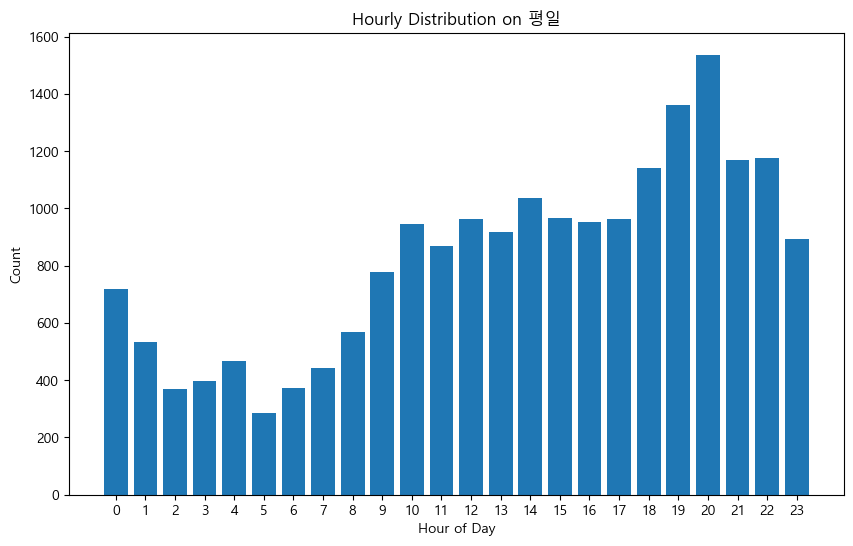

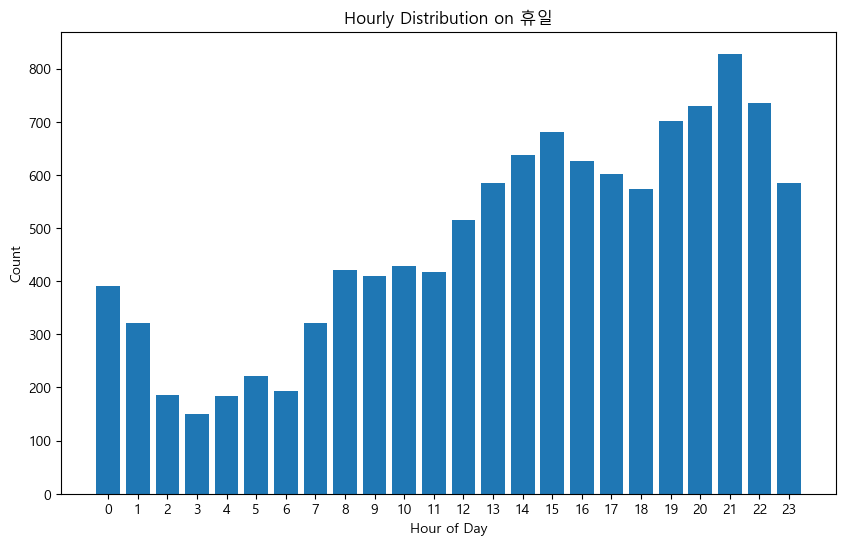

In [33]:
# 시간대별로 그룹화하고 각 day_type 별로 그래프 그리기
for day_type in ['평일', '휴일']:
    subset = total[total['next_date_type'] == day_type]
    count_per_hour = subset['hour'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(count_per_hour.index, count_per_hour.values)
    plt.title(f'Hourly Distribution on {day_type}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.xticks(range(0, 24))
    plt.show()

In [34]:
for day_type in ['평일', '휴일']:
    subset = total[total['next_date_type'] == day_type]
    print(day_type, subset['Category'].value_counts(normalize=True)*100)

평일 Category
TV프로그램    62.298224
영화        35.557910
키즈         2.143866
Name: proportion, dtype: float64
휴일 Category
TV프로그램    57.245237
영화        40.700926
키즈         2.053837
Name: proportion, dtype: float64


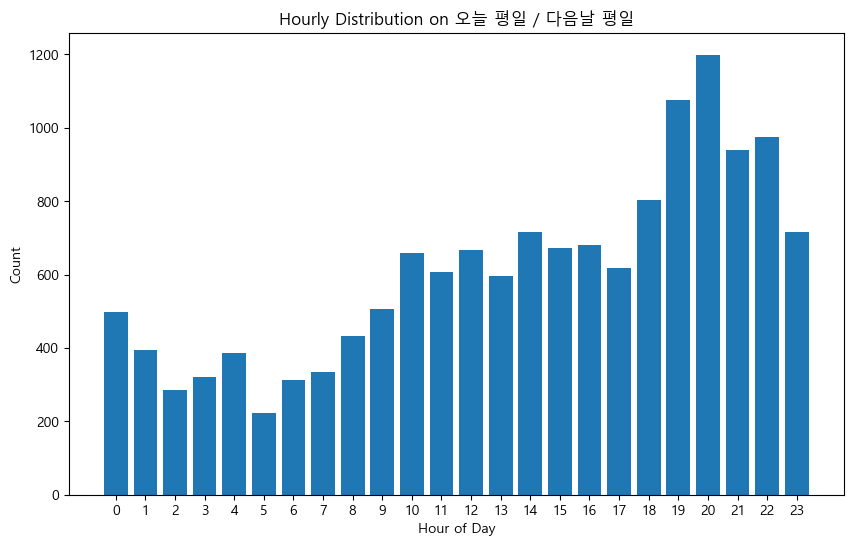

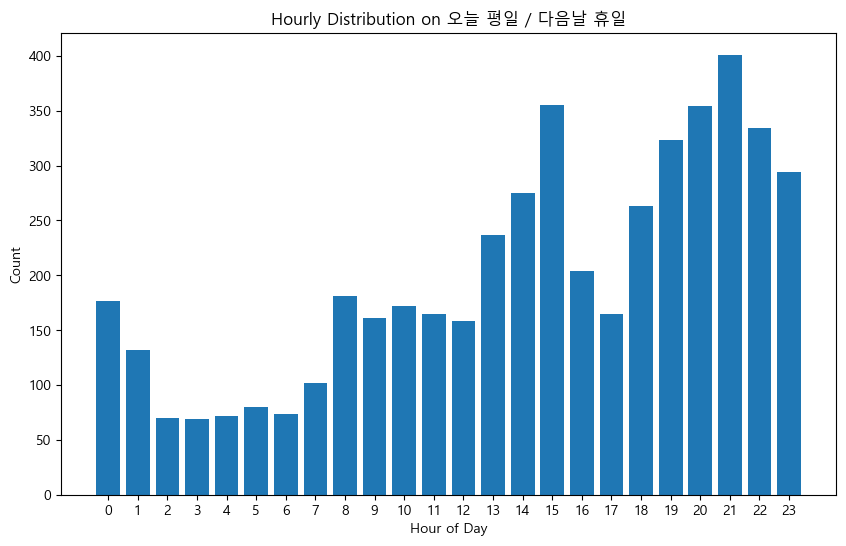

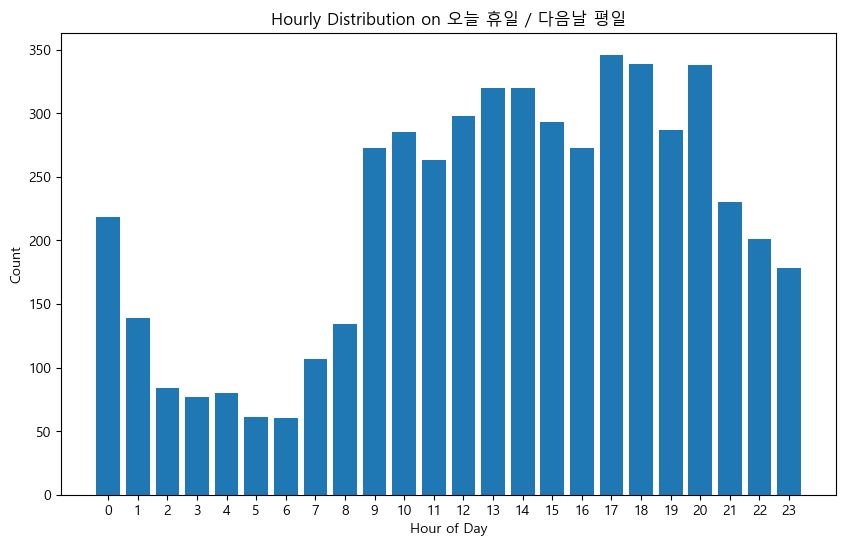

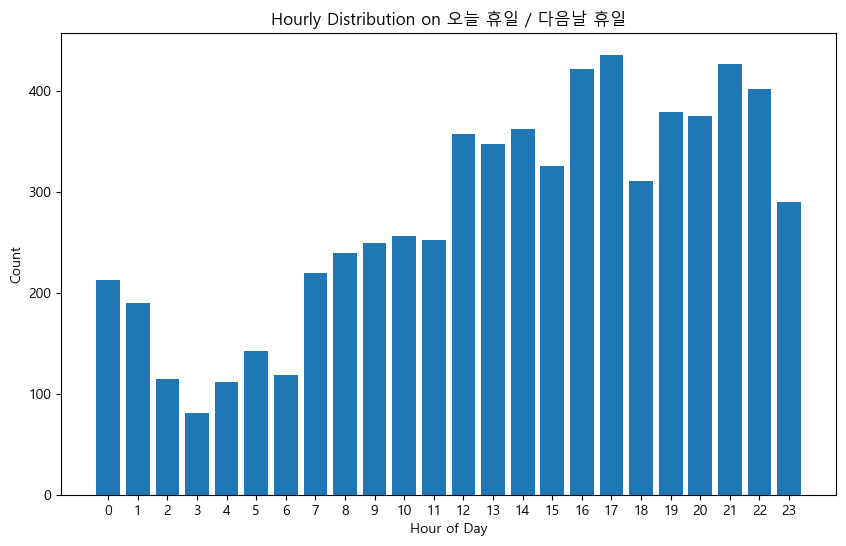

In [35]:
# 시간대별로 그룹화하고 각 day_type 별로 그래프 그리기
for day_type in ['평일', '휴일']:
    for date_type in ['평일', '휴일']:
        subset = total[(total['date_type'] == day_type) & (total['next_date_type'] == date_type)]
        count_per_hour = subset['hour'].value_counts().sort_index()

        plt.figure(figsize=(10, 6))
        plt.bar(count_per_hour.index, count_per_hour.values)
        plt.title(f'Hourly Distribution on 오늘 {day_type} / 다음날 {date_type}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Count')
        plt.xticks(range(0, 24))
        plt.show()

In [36]:
for day_type in ['평일', '휴일']:
    for date_type in ['평일', '휴일']:
        subset = total[(total['date_type'] == day_type) & (total['next_date_type'] == date_type)]
        print('오늘', day_type, '다음날', date_type, subset['Category'].value_counts(normalize=True)*100)

오늘 평일 다음날 평일 Category
TV프로그램    63.057456
영화        35.164159
키즈         1.778386
Name: proportion, dtype: float64
오늘 평일 다음날 휴일 Category
TV프로그램    62.370278
영화        36.322125
키즈         1.307597
Name: proportion, dtype: float64
오늘 휴일 다음날 평일 Category
TV프로그램    60.165257
영화        36.664105
키즈         3.170638
Name: proportion, dtype: float64
오늘 휴일 다음날 휴일 Category
TV프로그램    53.517512
영화        43.885870
키즈         2.596618
Name: proportion, dtype: float64


In [67]:
for day_type in ['평일', '휴일']:
    for date_type in ['평일', '휴일']:
        subset = total[(total['date_type'] == day_type) & (total['next_date_type'] == date_type)]
        subset_dawn = subset[(subset['hour'] >=23) |(subset['hour'] <= 7)]
        print('오늘', day_type, '다음날', date_type, '새벽', subset_dawn['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_day = subset[(subset['hour'] >=8) & (subset['hour'] <= 17)]
        print('오늘', day_type, '다음날', date_type, '낮', subset_day['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_night = subset[(subset['hour'] >=18) & (subset['hour'] <= 22)]
        print('오늘', day_type, '다음날', date_type, '저녁', subset_night['ct_cl'].value_counts(normalize=True)*100)
        print()

오늘 평일 다음날 평일 새벽 ct_cl
TV드라마       44.255687
영화          30.319608
TV 연예/오락    16.585085
TV 시사/교양     5.211633
TV애니메이션      2.533832
미분류          0.604665
키즈           0.374316
다큐           0.086381
우리동네         0.028794
Name: proportion, dtype: float64

오늘 평일 다음날 평일 낮 ct_cl
영화          35.093420
TV드라마       28.578392
TV 연예/오락    21.332250
TV 시사/교양     7.749797
TV애니메이션      5.280260
키즈           1.478473
다큐           0.259951
미분류          0.211210
우리동네         0.016247
Name: proportion, dtype: float64

오늘 평일 다음날 평일 저녁 ct_cl
영화          38.621795
TV드라마       28.645833
TV 연예/오락    20.152244
TV 시사/교양     6.209936
키즈           3.125000
TV애니메이션      2.824519
미분류          0.240385
다큐           0.120192
라이프          0.040064
우리동네         0.020032
Name: proportion, dtype: float64

오늘 평일 다음날 휴일 새벽 ct_cl
TV드라마       37.102804
영화          33.364486
TV 연예/오락    18.224299
TV 시사/교양     8.785047
TV애니메이션      2.429907
키즈           0.093458
Name: proportion, dtype: float64

오늘 평일 다음날 휴일 낮 ct_cl
영화      

vod, con 따로 확인

In [68]:
# vod
vod

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,학습,6.0,인기작가 서현의 그림책! 온몸으로 읽는 그림책 간질간질. 글자가 형태로 보이지 않고...,-,6,2023-09-14 21:11:10,키즈,간질간질,3674,21
10157,66317000,알사탕,키즈,학습,8.0,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,2023-09-03 22:35:44,키즈,알사탕,3671,22
10158,66317000,알사탕,키즈,학습,3.3,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,2023-09-03 22:32:10,키즈,알사탕,3671,22
10159,66900000,월간 아기상어,키즈,학습,0.8,8-Bit Baby Shark. 오락실에 아기 상어가 나타났다?! 추억의 8비트 버...,아기상어,1,2023-09-04 12:00:57,키즈,월간아기상어,406,12


In [71]:
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
782,63419000,복면가왕,TV 연예/오락,기타,43.7,여름 특집! 무더위를 날려버릴 시원한 가창력의 복면가수 대거 등장! 녹화 도중 사상...,"김성주,김구라",92,2023-08-01 00:42:42,TV프로그램,복면가왕,391,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
6859,63030000,경이로운 소문2: 카운터 펀치,TV드라마,외화 시리즈,NaN,역대급 악귀들의 등장으로 긴장감이 감도는 카운터와 융. 신입 카운터 영입이 그 어느...,"조병규,유준상,김세정,염혜란,안석환,진선규,강기영,김히어라,유인수,이지원,김은수",74,2023-08-01 00:45:43,TV프로그램,경이로운소문2:카운터펀치,888,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
10111,63030000,프리한19,TV 연예/오락,기타,NaN,"납량 특집! 귀신을 쫓는 자, 퇴마 19. 검은 눈물을 흘리는 기이한 인형 애니! ...","전현무,오상진,한석준",59,2023-08-01 00:45:28,TV프로그램,프리한19,1257,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,"라진,이일동",40,2023-08-01 00:29:38,TV프로그램,학려화정,954,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
4478,65226000,미스터 주: 사라진 VIP,영화,코미디,NaN,"화면해설, 자막 삽입. 국가정보국 에이스 요원 태주. VIP 경호 중, VIP가 사...","이성민,김서형,배정남,신하균,갈소원,유인나,김수미,이선균,이정은,이순재,김보성,조한...",113,2023-08-01 00:53:57,영화,미스터주:사라진VIP,2516,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,64984000,각시탈,TV드라마,기타,0.0,호텔에 있어야 할 목단이 사라진 걸 알게 된 슈운지는 금화정에서 홍주에 의해 죽임을...,"주원,진세연,박기웅,한채아",64,2023-09-30 23:57:02,TV프로그램,각시탈,757,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일
13711,64130000,효심이네 각자도생,TV드라마,기타,NaN,"효도가 명희를 의천 빌라에 데려다 놓는다. 태민은 태호에게 프로젝트를 맡기고, 진범...","유이,하준,고주원",64,2023-09-30 23:40:36,TV프로그램,효심이네각자도생,1885,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일
15859,61802000,블리치 천년혈전편: 결별담,TV애니메이션,액션/모험,NaN,하쉬발트와 우류를 데리고 마침내 영왕궁에 도착한 유하바하. 그들을 맞이한 건 영번대...,"쿠로사키 이치고,쿠치키 루키아",23,2023-09-30 23:21:36,TV프로그램,블리치천년혈전편:결별담,1107,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일
20610,65838000,밀수,영화,액션/어드벤쳐,NaN,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,"김혜수,염정아,조인성,박정민,김종수,고민시",0,2023-09-30 23:33:33,영화,밀수,2865,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일


In [74]:
vod_datetype = pd.merge(vod, total, on=['subsr', 'asset_nm', 'ct_cl', 'genre_of_ct_cl', 'SMRY', 'ACTR_DISP','disp_rtm','Category', 'rename','hour', 'use_tms', 'log_dt', 'vod_id'], how='left')
vod_datetype

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
0,65941000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-12 16:35:07,TV프로그램,그것이알고싶다,297,16,2023-08-12,휴일,2023-08-13,휴일,2023-08-12 16:00:00,2023-08-11,평일
1,66873000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-16 20:52:27,TV프로그램,그것이알고싶다,297,20,2023-08-16,평일,2023-08-17,평일,2023-08-16 20:00:00,2023-08-15,휴일
2,66873000,그것이알고싶다,TV 시사/교양,기타,12.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-29 19:47:27,TV프로그램,그것이알고싶다,297,19,2023-08-29,평일,2023-08-30,평일,2023-08-29 19:00:00,2023-08-28,평일
3,61689000,그것이알고싶다,TV 시사/교양,기타,80.0,살인자의 자백 그리고 아크말의 고백. 방대한 수사기록과 당시 아크말의 진술을 토대로...,김상중,80,2023-08-13 13:06:09,TV프로그램,그것이알고싶다,297,13,2023-08-13,휴일,2023-08-14,평일,2023-08-13 13:00:00,2023-08-12,휴일
4,61619000,꼬리에꼬리를무는그날이야기,TV 시사/교양,기타,69.7,"살인범의 미토콘드리아 - 2006 냉동고 살인사건. 2006년 7월 23일, 서울 ...","장도연,장현성,장성규",73,2023-08-04 09:27:37,TV프로그램,꼬리에꼬리를무는그날이야기,8,9,2023-08-04,평일,2023-08-05,휴일,2023-08-04 09:00:00,2023-08-03,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,학습,6.0,인기작가 서현의 그림책! 온몸으로 읽는 그림책 간질간질. 글자가 형태로 보이지 않고...,-,6,2023-09-14 21:11:10,키즈,간질간질,3674,21,2023-09-14,평일,2023-09-15,평일,2023-09-14 21:00:00,2023-09-13,평일
10157,66317000,알사탕,키즈,학습,8.0,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,2023-09-03 22:35:44,키즈,알사탕,3671,22,2023-09-03,휴일,2023-09-04,평일,2023-09-03 22:00:00,2023-09-02,휴일
10158,66317000,알사탕,키즈,학습,3.3,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,8,2023-09-03 22:32:10,키즈,알사탕,3671,22,2023-09-03,휴일,2023-09-04,평일,2023-09-03 22:00:00,2023-09-02,휴일
10159,66900000,월간 아기상어,키즈,학습,0.8,8-Bit Baby Shark. 오락실에 아기 상어가 나타났다?! 추억의 8비트 버...,아기상어,1,2023-09-04 12:00:57,키즈,월간아기상어,406,12,2023-09-04,평일,2023-09-05,평일,2023-09-04 12:00:00,2023-09-03,휴일


In [96]:
# vod 평일 낮, 휴일 낮 비교
for today in ['평일', '휴일']:
    subset = vod_datetype[(vod_datetype['date_type'] == today)]
    subset_day = subset[(subset['hour'] >=18) & (subset['hour'] <= 23)]
    print('오늘', today, '저녁', subset_day['ct_cl'].value_counts(normalize=True)*100)
    print()

오늘 평일 저녁 ct_cl
TV드라마       37.874551
TV 연예/오락    25.529365
영화          19.256892
TV 시사/교양     7.231322
키즈           7.031562
TV애니메이션      3.036356
다큐           0.039952
Name: proportion, dtype: float64

오늘 휴일 저녁 ct_cl
TV드라마       34.204082
TV 연예/오락    25.142857
영화          22.204082
TV 시사/교양     8.163265
키즈           7.510204
TV애니메이션      2.040816
다큐           0.653061
우리동네         0.081633
Name: proportion, dtype: float64



In [88]:
# vod 시간별 시청 비율 확인
for day_type in ['평일']:
    for date_type in ['평일', '휴일']:
        subset = vod_datetype[(vod_datetype['date_type'] == day_type) & (vod_datetype['next_date_type'] == date_type)]
        subset_dawn = subset[(subset['hour'] >=23) |(subset['hour'] <= 7)]
        print('오늘', day_type, '다음날', date_type, '새벽', subset_dawn['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_day = subset[(subset['hour'] >=8) & (subset['hour'] <= 17)]
        print('오늘', day_type, '다음날', date_type, '낮', subset_day['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_night = subset[(subset['hour'] >=18) & (subset['hour'] <= 22)]
        print('오늘', day_type, '다음날', date_type, '저녁', subset_night['ct_cl'].value_counts(normalize=True)*100)
        print()

오늘 평일 다음날 평일 낮 ct_cl
TV드라마       33.423036
TV 연예/오락    26.372443
영화          23.466093
TV 시사/교양     6.620022
키즈           5.920344
TV애니메이션      3.767492
우리동네         0.322928
다큐           0.107643
Name: proportion, dtype: float64

오늘 평일 다음날 휴일 낮 ct_cl
TV드라마       33.423036
TV 연예/오락    26.372443
영화          23.466093
TV 시사/교양     6.620022
키즈           5.920344
TV애니메이션      3.767492
우리동네         0.322928
다큐           0.107643
Name: proportion, dtype: float64



In [91]:
# vod 시간별 시청 비율 확인
for yesterday in ['평일']:
    for today in ['평일', '휴일']:
        subset = vod_datetype[(vod_datetype['yesterday_type'] == yesterday) & (vod_datetype['date_type'] == today)]
        subset_dawn = subset[(subset['hour'] >=23) |(subset['hour'] <= 7)]
        print('전날', yesterday, '오늘', today, '새벽', subset_dawn['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_day = subset[(subset['hour'] >=8) & (subset['hour'] <= 17)]
        print('전날', yesterday, '오늘', today, '낮', subset_day['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_night = subset[(subset['hour'] >=18) & (subset['hour'] <= 22)]
        print('전날', yesterday, '오늘', today, '저녁', subset_night['ct_cl'].value_counts(normalize=True)*100)
        print()

전날 평일 오늘 평일 새벽 ct_cl
TV드라마       57.105943
TV 연예/오락    18.087855
영화          13.522825
TV 시사/교양     7.321275
TV애니메이션      3.100775
키즈           0.861326
Name: proportion, dtype: float64

전날 평일 오늘 평일 낮 ct_cl
TV드라마       42.013423
영화          20.581655
TV 연예/오락    20.089485
TV 시사/교양     8.366890
TV애니메이션      5.324385
키즈           3.087248
다큐           0.492170
우리동네         0.044743
Name: proportion, dtype: float64

전날 평일 오늘 평일 저녁 ct_cl
TV드라마       34.922395
TV 연예/오락    25.997783
영화          20.565410
키즈           9.368071
TV 시사/교양     6.152993
TV애니메이션      2.993348
Name: proportion, dtype: float64

전날 평일 오늘 휴일 새벽 ct_cl
TV드라마       47.835991
TV 연예/오락    23.006834
영화          22.779043
TV 시사/교양     3.872437
키즈           1.822323
TV애니메이션      0.683371
Name: proportion, dtype: float64

전날 평일 오늘 휴일 낮 ct_cl
TV드라마       33.414933
TV 연예/오락    28.396573
영화          23.867809
TV 시사/교양     7.466340
키즈           3.427173
TV애니메이션      2.937576
우리동네         0.367197
다큐           0.122399
Name: proport

In [85]:
# vod 시간별 시청 비율 확인
for day_type in ['휴일']:
    for date_type in ['평일', '휴일']:
        subset = vod_datetype[(vod_datetype['date_type'] == day_type) & (vod_datetype['next_date_type'] == date_type)]
        subset_dawn = subset[(subset['hour'] >=23) |(subset['hour'] <= 7)]
        print('오늘', day_type, '다음날', date_type, '새벽', subset_dawn['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_day = subset[(subset['hour'] >=8) & (subset['hour'] <= 17)]
        print('오늘', day_type, '다음날', date_type, '낮', subset_day['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_night = subset[(subset['hour'] >=18) & (subset['hour'] <= 22)]
        print('오늘', day_type, '다음날', date_type, '저녁', subset_night['ct_cl'].value_counts(normalize=True)*100)
        print()

오늘 휴일 다음날 평일 새벽 ct_cl
TV드라마       51.200000
TV 연예/오락    25.600000
영화          11.466667
키즈           5.866667
TV 시사/교양     5.333333
TV애니메이션      0.533333
Name: proportion, dtype: float64

오늘 휴일 다음날 평일 낮 ct_cl
TV드라마       34.843581
TV 연예/오락    25.458468
영화          22.545847
TV 시사/교양     7.335491
TV애니메이션      5.070119
키즈           3.991370
우리동네         0.647249
다큐           0.107875
Name: proportion, dtype: float64

오늘 휴일 다음날 평일 저녁 ct_cl
TV드라마       34.426230
TV 연예/오락    27.459016
영화          20.491803
키즈           7.991803
TV 시사/교양     7.581967
TV애니메이션      1.024590
다큐           0.819672
우리동네         0.204918
Name: proportion, dtype: float64

오늘 휴일 다음날 휴일 새벽 ct_cl
TV드라마       50.843882
영화          21.940928
TV 연예/오락    20.464135
TV 시사/교양     4.219409
키즈           1.687764
TV애니메이션      0.632911
공연/음악        0.210970
Name: proportion, dtype: float64

오늘 휴일 다음날 휴일 낮 ct_cl
TV드라마       32.008593
TV 연예/오락    27.282492
영화          24.382385
키즈           7.841031
TV 시사/교양     5.907626
TV애니메이션 

In [86]:
# vod 시간별 시청 비율 확인
for yesterday in ['평일', '휴일']:
    for today in ['휴일']:
        subset = vod_datetype[(vod_datetype['yesterday_type'] == yesterday) & (vod_datetype['date_type'] == today)]
        subset_dawn = subset[(subset['hour'] >=23) |(subset['hour'] <= 7)]
        print('전날', yesterday, '오늘', today, '새벽', subset_dawn['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_day = subset[(subset['hour'] >=8) & (subset['hour'] <= 17)]
        print('전날', yesterday, '오늘', today, '낮', subset_day['ct_cl'].value_counts(normalize=True)*100)
        print()
        subset_night = subset[(subset['hour'] >=18) & (subset['hour'] <= 22)]
        print('전날', yesterday, '오늘', today, '저녁', subset_night['ct_cl'].value_counts(normalize=True)*100)
        print()

전날 평일 오늘 휴일 새벽 ct_cl
TV드라마       47.835991
TV 연예/오락    23.006834
영화          22.779043
TV 시사/교양     3.872437
키즈           1.822323
TV애니메이션      0.683371
Name: proportion, dtype: float64

전날 평일 오늘 휴일 낮 ct_cl
TV드라마       33.414933
TV 연예/오락    28.396573
영화          23.867809
TV 시사/교양     7.466340
키즈           3.427173
TV애니메이션      2.937576
우리동네         0.367197
다큐           0.122399
Name: proportion, dtype: float64

전날 평일 오늘 휴일 저녁 ct_cl
TV드라마       30.824373
영화          24.910394
TV 연예/오락    24.551971
키즈           8.064516
TV 시사/교양     7.706093
TV애니메이션      3.225806
다큐           0.716846
Name: proportion, dtype: float64

전날 휴일 오늘 휴일 새벽 ct_cl
TV드라마       54.390244
TV 연예/오락    22.439024
영화          11.463415
TV 시사/교양     5.609756
키즈           5.365854
TV애니메이션      0.487805
공연/음악        0.243902
Name: proportion, dtype: float64

전날 휴일 오늘 휴일 낮 ct_cl
TV드라마       33.429395
TV 연예/오락    24.783862
영화          23.150817
키즈           7.877041
TV 시사/교양     5.955812
TV애니메이션      4.418828
우리동네         

In [77]:
con['asset_nm'] = con['series_nm']
con.drop(['series_nm', 'super_asset_nm'], axis=1, inplace=True)
con

,subsr,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,asset_nm
0,65968000,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,2023-08-13 07:11:55,키즈,핑크퐁동물동요,882,7,핑크퐁 동물 동요
1,65968000,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,2023-08-13 07:12:15,키즈,핑크퐁동물동요,882,7,핑크퐁 동물 동요
2,63086000,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",11,2023-08-27 14:55:42,키즈,지니강이플러스시즌7,1622,14,지니강이 플러스 시즌7
3,63086000,키즈,기타,지니가 화장품으로 슬라임을 만들어요. / 슈퍼히어로 강이! 문을 열면 춤을 춰요.,"헤이지니,럭키강이",11,2023-08-27 15:24:17,키즈,지니강이플러스시즌9,2043,15,지니강이 플러스 시즌9
4,62733000,키즈,기타,미니 시리얼 팬케이크 만들기.,-,13,2023-08-16 11:28:16,키즈,엘리가간다시즌12,1958,11,엘리가간다 시즌12
...,...,...,...,...,...,...,...,...,...,...,...,...
21122,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,슈퍼 토끼
21123,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,슈퍼 토끼
21124,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,슈퍼 토끼
21125,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,슈퍼 토끼


In [78]:
con_datetype = pd.merge(con, total, on=['subsr', 'asset_nm','ct_cl', 'genre_of_ct_cl', 'SMRY', 'ACTR_DISP', 'disp_rtm', 'log_dt', 'Category', 'rename', 'vod_id', 'hour'], how='left')
con_datetype

,subsr,ct_cl,genre_of_ct_cl,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,asset_nm,use_tms,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
0,65968000,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,2023-08-13 07:11:55,키즈,핑크퐁동물동요,882,7,핑크퐁 동물 동요,NaN,2023-08-13,휴일,2023-08-14,평일,2023-08-13 07:00:00,2023-08-12,휴일
1,65968000,키즈,기타,"겨울잠. 숲, 바다, 극지방 등 세계 여러 곳에 사는 동물 친구들을 만나러 가자! ...",핑크퐁,1,2023-08-13 07:12:15,키즈,핑크퐁동물동요,882,7,핑크퐁 동물 동요,NaN,2023-08-13,휴일,2023-08-14,평일,2023-08-13 07:00:00,2023-08-12,휴일
2,63086000,키즈,기타,로봇 세상에서 킥보드를 타요. 로보카 폴리 브룸스 타운에서 킥보드를 타요~ / 새로...,"헤이지니,럭키강이",11,2023-08-27 14:55:42,키즈,지니강이플러스시즌7,1622,14,지니강이 플러스 시즌7,NaN,2023-08-27,휴일,2023-08-28,평일,2023-08-27 14:00:00,2023-08-26,휴일
3,63086000,키즈,기타,지니가 화장품으로 슬라임을 만들어요. / 슈퍼히어로 강이! 문을 열면 춤을 춰요.,"헤이지니,럭키강이",11,2023-08-27 15:24:17,키즈,지니강이플러스시즌9,2043,15,지니강이 플러스 시즌9,NaN,2023-08-27,휴일,2023-08-28,평일,2023-08-27 15:00:00,2023-08-26,휴일
4,62733000,키즈,기타,미니 시리얼 팬케이크 만들기.,-,13,2023-08-16 11:28:16,키즈,엘리가간다시즌12,1958,11,엘리가간다 시즌12,NaN,2023-08-16,평일,2023-08-17,평일,2023-08-16 11:00:00,2023-08-15,휴일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21114,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:57,키즈,슈퍼토끼,544,12,슈퍼 토끼,NaN,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 12:00:00,2023-09-29,휴일
21115,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:54,키즈,슈퍼토끼,544,12,슈퍼 토끼,NaN,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 12:00:00,2023-09-29,휴일
21116,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:56,키즈,슈퍼토끼,544,12,슈퍼 토끼,NaN,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 12:00:00,2023-09-29,휴일
21117,64551000,키즈,학습,"[교보문고,YES24,알라딘 베스트셀러] 경주에 진 그 토끼는 어떻게 되었을까? 내...",-,12,2023-09-30 12:16:46,키즈,슈퍼토끼,544,12,슈퍼 토끼,NaN,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 12:00:00,2023-09-29,휴일


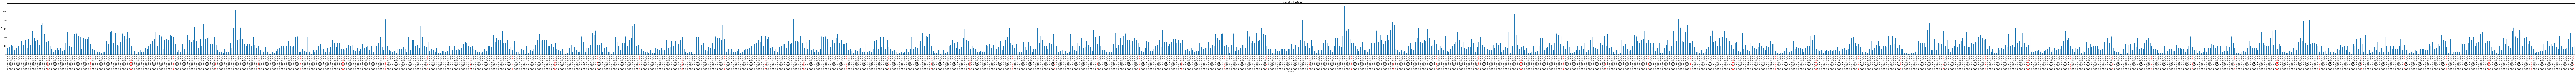

In [37]:
# 날짜, 시간 순으로 그래프 확인
# YYYY-MM-DD 열 만들기
total['datehour'] = pd.to_datetime(total['log_date'].astype(str) + ' ' + total['hour'].astype(str) + ':00:00')
total = total.sort_values(by='datehour')

# datehour의 개수 세기
datehour_counts = total['datehour'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(300, 6))
datehour_counts.plot(kind='bar')
plt.title('Frequency of Each Datehour')
plt.xlabel('Datehour')
plt.ylabel('Count')

# x축 레이블에 색상 적용
ax = plt.gca()  # 현재 축 가져오기
labels = datehour_counts.index

for i, label in enumerate(labels):
    if label.hour == 23:
        ax.get_xticklabels()[i].set_color('red')

plt.show()

In [38]:
# 이전날이 휴일인 날과 이전날이 휴일이 아닌 날의 차이 확인
total['yesterday'] = total['log_date'].apply(lambda x: x + pd.DateOffset(days=-1))
total['yesterday_type'] = total['yesterday'].apply(classify_date)
total

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
782,63419000,복면가왕,TV 연예/오락,기타,43.7,여름 특집! 무더위를 날려버릴 시원한 가창력의 복면가수 대거 등장! 녹화 도중 사상...,"김성주,김구라",92,2023-08-01 00:42:42,TV프로그램,복면가왕,391,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
6859,63030000,경이로운 소문2: 카운터 펀치,TV드라마,외화 시리즈,NaN,역대급 악귀들의 등장으로 긴장감이 감도는 카운터와 융. 신입 카운터 영입이 그 어느...,"조병규,유준상,김세정,염혜란,안석환,진선규,강기영,김히어라,유인수,이지원,김은수",74,2023-08-01 00:45:43,TV프로그램,경이로운소문2:카운터펀치,888,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
10111,63030000,프리한19,TV 연예/오락,기타,NaN,"납량 특집! 귀신을 쫓는 자, 퇴마 19. 검은 눈물을 흘리는 기이한 인형 애니! ...","전현무,오상진,한석준",59,2023-08-01 00:45:28,TV프로그램,프리한19,1257,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,"라진,이일동",40,2023-08-01 00:29:38,TV프로그램,학려화정,954,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
4478,65226000,미스터 주: 사라진 VIP,영화,코미디,NaN,"화면해설, 자막 삽입. 국가정보국 에이스 요원 태주. VIP 경호 중, VIP가 사...","이성민,김서형,배정남,신하균,갈소원,유인나,김수미,이선균,이정은,이순재,김보성,조한...",113,2023-08-01 00:53:57,영화,미스터주:사라진VIP,2516,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,64984000,각시탈,TV드라마,기타,0.0,호텔에 있어야 할 목단이 사라진 걸 알게 된 슈운지는 금화정에서 홍주에 의해 죽임을...,"주원,진세연,박기웅,한채아",64,2023-09-30 23:57:02,TV프로그램,각시탈,757,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일
13711,64130000,효심이네 각자도생,TV드라마,기타,NaN,"효도가 명희를 의천 빌라에 데려다 놓는다. 태민은 태호에게 프로젝트를 맡기고, 진범...","유이,하준,고주원",64,2023-09-30 23:40:36,TV프로그램,효심이네각자도생,1885,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일
15859,61802000,블리치 천년혈전편: 결별담,TV애니메이션,액션/모험,NaN,하쉬발트와 우류를 데리고 마침내 영왕궁에 도착한 유하바하. 그들을 맞이한 건 영번대...,"쿠로사키 이치고,쿠치키 루키아",23,2023-09-30 23:21:36,TV프로그램,블리치천년혈전편:결별담,1107,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일
20610,65838000,밀수,영화,액션/어드벤쳐,NaN,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,"김혜수,염정아,조인성,박정민,김종수,고민시",0,2023-09-30 23:33:33,영화,밀수,2865,23,2023-09-30,휴일,2023-10-01,휴일,2023-09-30 23:00:00,2023-09-29,휴일


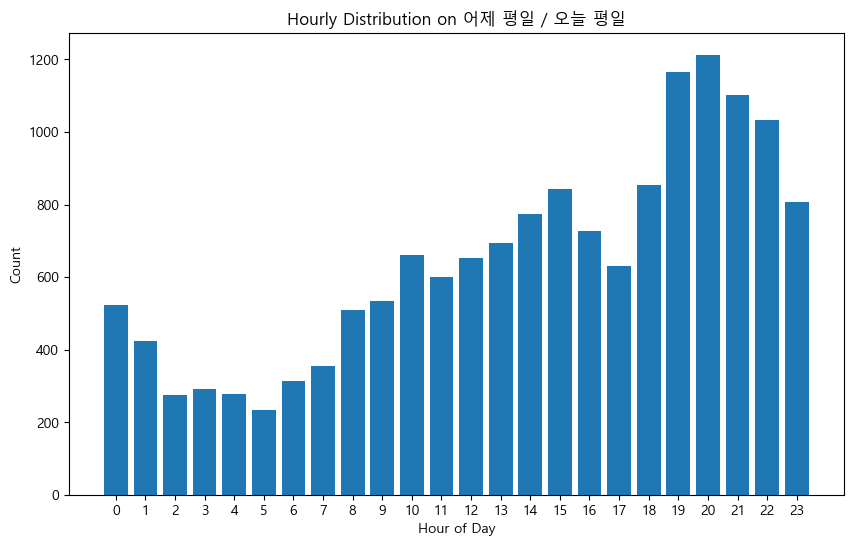

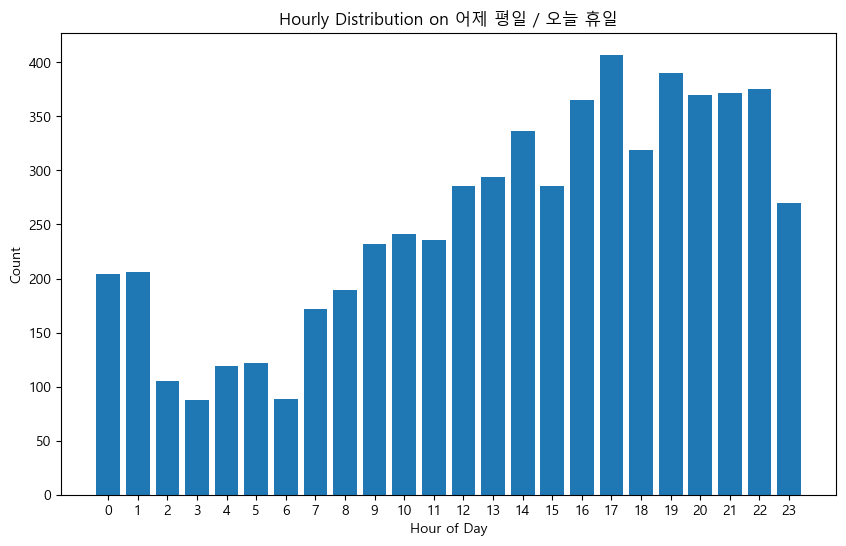

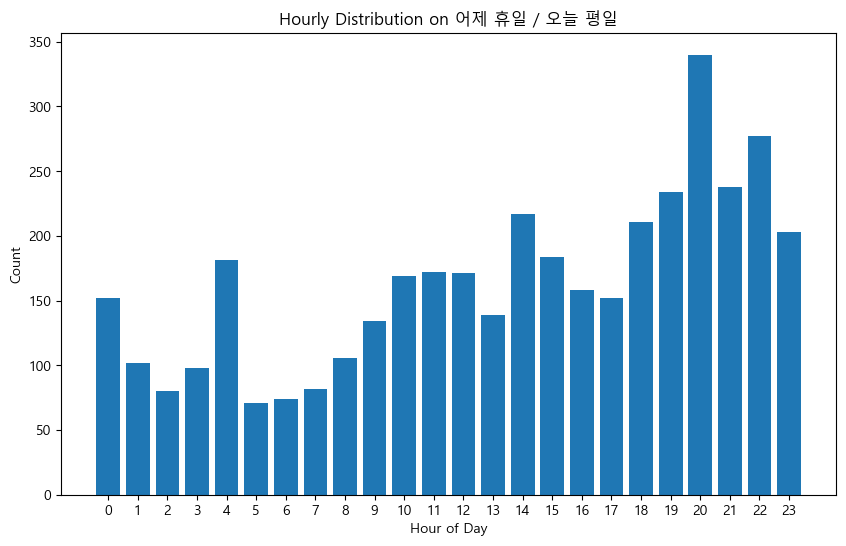

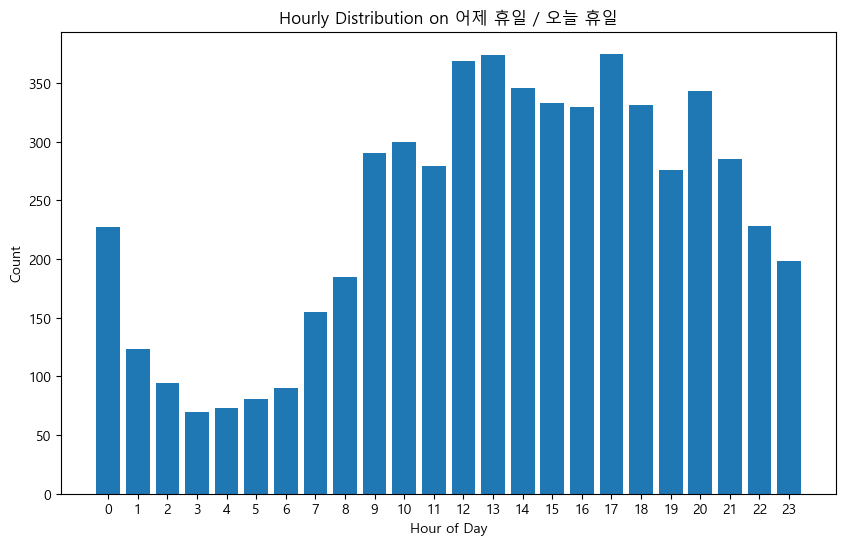

In [39]:
# 시간대별로 그룹화하고 각 day_type 별로 그래프 그리기
for yesterday in ['평일', '휴일']:
    for today in ['평일', '휴일']:
        subset = total[(total['yesterday_type'] == yesterday) & (total['date_type'] == today)]
        count_per_hour = subset['hour'].value_counts().sort_index()

        plt.figure(figsize=(10, 6))
        plt.bar(count_per_hour.index, count_per_hour.values)
        plt.title(f'Hourly Distribution on 어제 {yesterday} / 오늘 {today}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Count')
        plt.xticks(range(0, 24))
        plt.show()

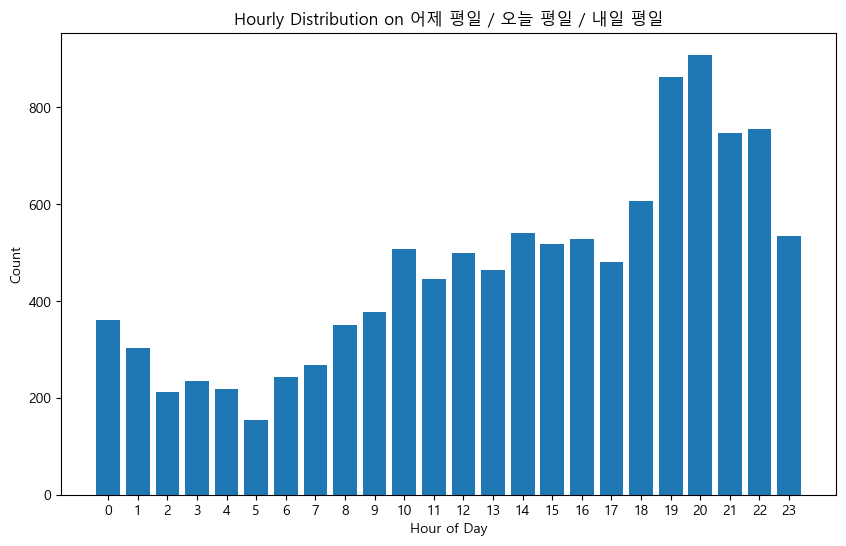

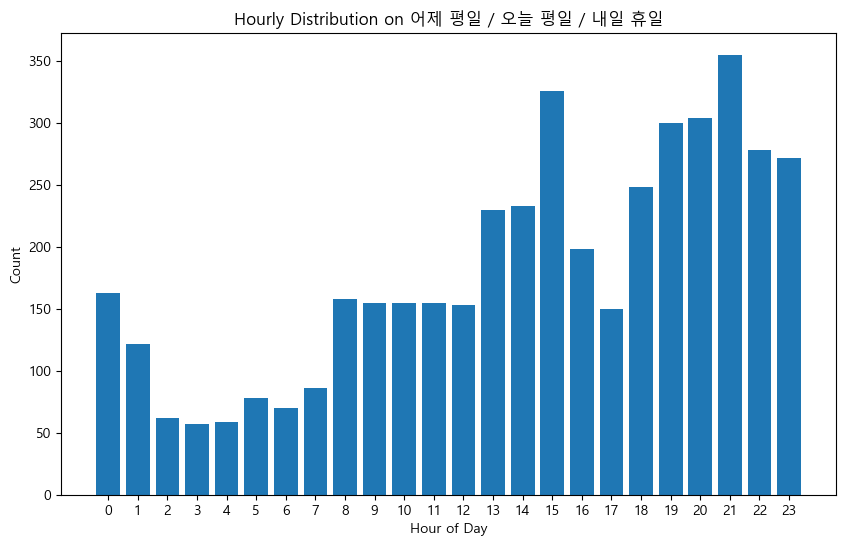

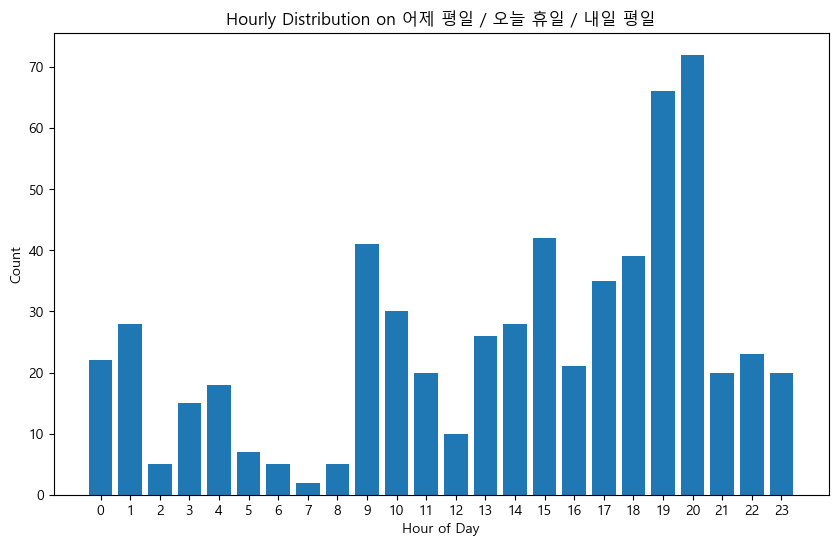

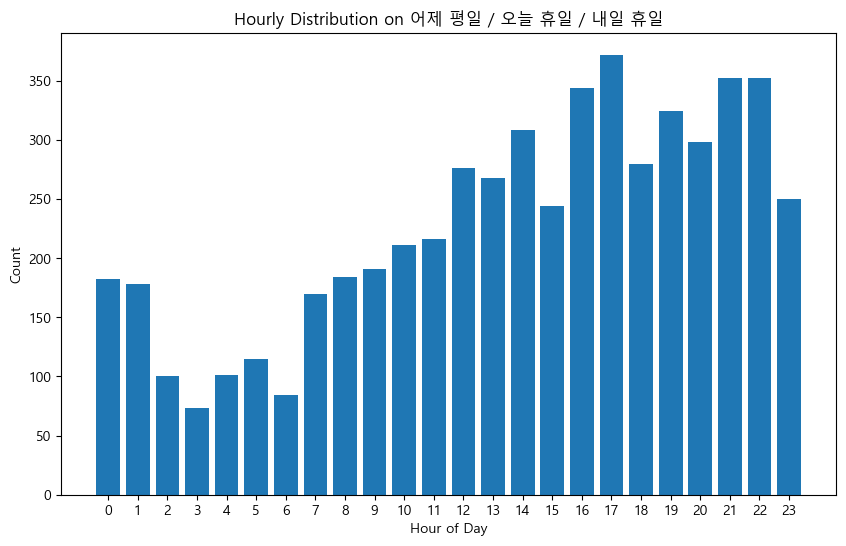

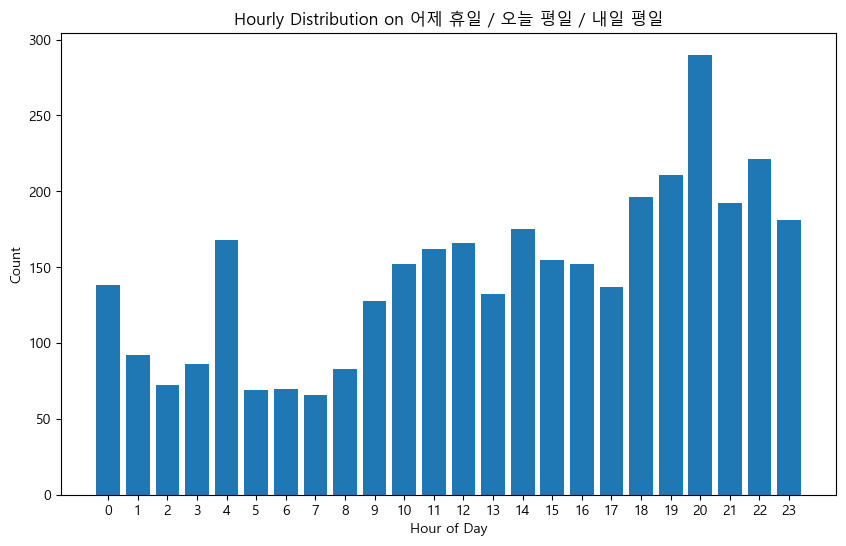

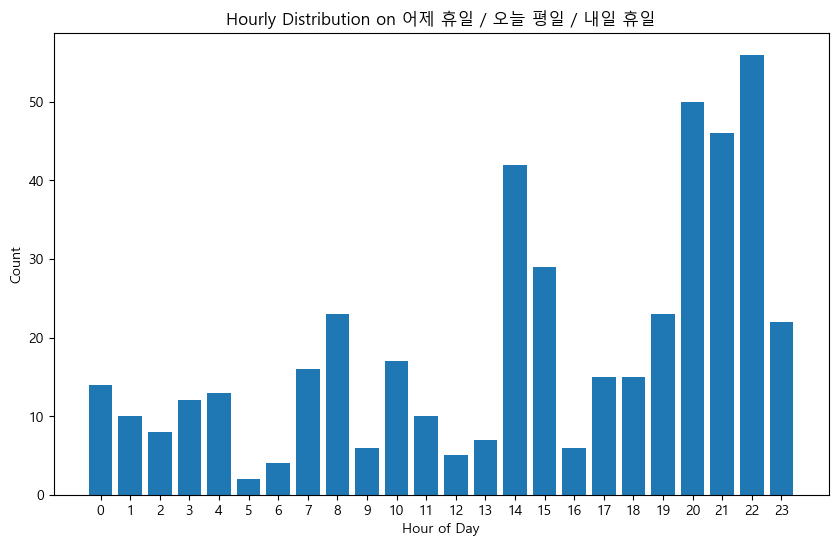

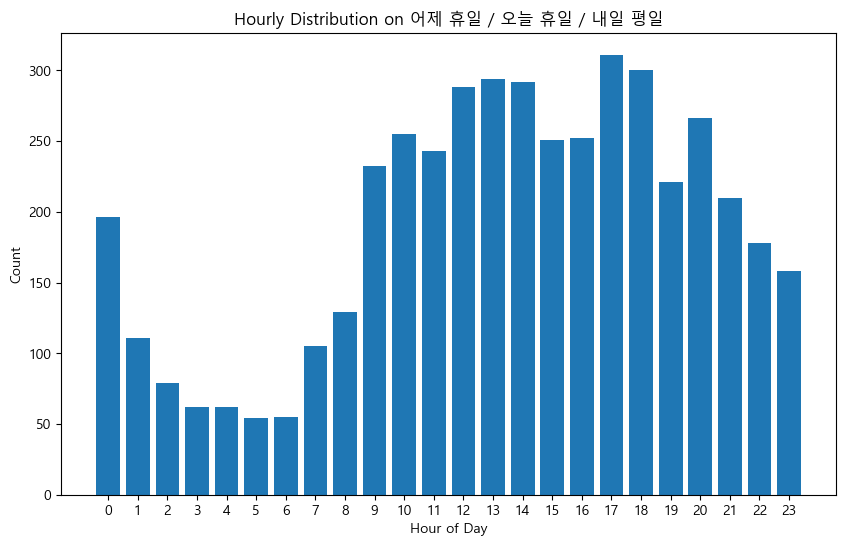

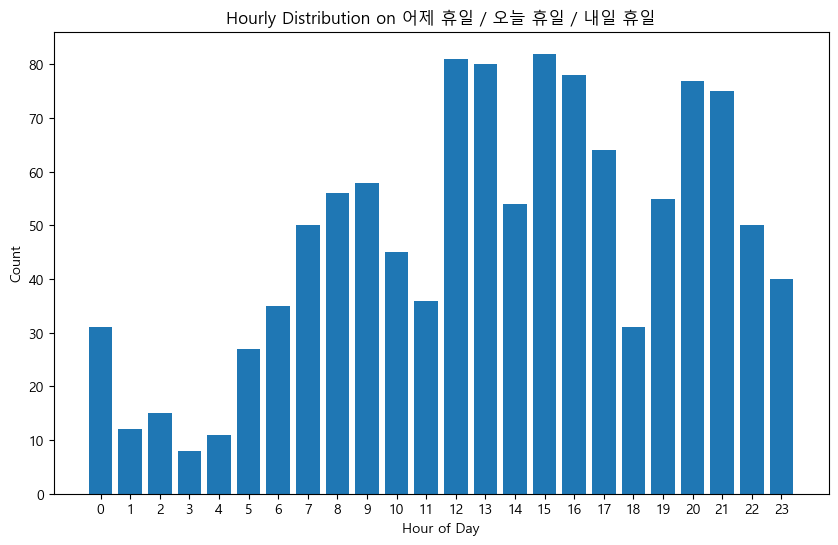

In [40]:
# 시간대별로 그룹화하고 각 day_type 별로 그래프 그리기
for yesterday in ['평일', '휴일']:
    for today in ['평일', '휴일']:
        for tomorrow in ['평일', '휴일']:
            subset = total[(total['yesterday_type'] == yesterday) & (total['date_type'] == today) & (total['next_date_type'] == tomorrow)]
            count_per_hour = subset['hour'].value_counts().sort_index()

            plt.figure(figsize=(10, 6))
            plt.bar(count_per_hour.index, count_per_hour.values)
            plt.title(f'Hourly Distribution on 어제 {yesterday} / 오늘 {today} / 내일 {tomorrow}')
            plt.xlabel('Hour of Day')
            plt.ylabel('Count')
            plt.xticks(range(0, 24))
            plt.show()

In [41]:
# 평평평 확인
www = total[(total['yesterday_type'] == '평일') & (total['date_type'] == '평일') & (total['next_date_type'] == '평일')]
www

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
782,63419000,복면가왕,TV 연예/오락,기타,43.7,여름 특집! 무더위를 날려버릴 시원한 가창력의 복면가수 대거 등장! 녹화 도중 사상...,"김성주,김구라",92,2023-08-01 00:42:42,TV프로그램,복면가왕,391,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
6859,63030000,경이로운 소문2: 카운터 펀치,TV드라마,외화 시리즈,NaN,역대급 악귀들의 등장으로 긴장감이 감도는 카운터와 융. 신입 카운터 영입이 그 어느...,"조병규,유준상,김세정,염혜란,안석환,진선규,강기영,김히어라,유인수,이지원,김은수",74,2023-08-01 00:45:43,TV프로그램,경이로운소문2:카운터펀치,888,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
10111,63030000,프리한19,TV 연예/오락,기타,NaN,"납량 특집! 귀신을 쫓는 자, 퇴마 19. 검은 눈물을 흘리는 기이한 인형 애니! ...","전현무,오상진,한석준",59,2023-08-01 00:45:28,TV프로그램,프리한19,1257,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
3580,60067000,학려화정,TV드라마,외화 시리즈,32.7,황제가 태자비 시해 사건을 그냥 무마하려 하자 소정권은 삼사를 움직여 황제를 압박한...,"라진,이일동",40,2023-08-01 00:29:38,TV프로그램,학려화정,954,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
4478,65226000,미스터 주: 사라진 VIP,영화,코미디,NaN,"화면해설, 자막 삽입. 국가정보국 에이스 요원 태주. VIP 경호 중, VIP가 사...","이성민,김서형,배정남,신하균,갈소원,유인나,김수미,이선균,이정은,이순재,김보성,조한...",113,2023-08-01 00:53:57,영화,미스터주:사라진VIP,2516,0,2023-08-01,평일,2023-08-02,평일,2023-08-01 00:00:00,2023-07-31,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,61173000,귀공자,영화,기타,NaN,방영일 : 9월 26일. 줄거리 : 필리핀에서 불법 경기장을 전전하며 병든 어머니와...,"김선호,강태주",0,2023-09-26 23:00:55,영화,귀공자,2058,23,2023-09-26,평일,2023-09-27,평일,2023-09-26 23:00:00,2023-09-25,평일
17521,61173000,귀공자,영화,기타,NaN,방영일 : 9월 26일. 줄거리 : 필리핀에서 불법 경기장을 전전하며 병든 어머니와...,"김선호,강태주",0,2023-09-26 23:00:16,영화,귀공자,2058,23,2023-09-26,평일,2023-09-27,평일,2023-09-26 23:00:00,2023-09-25,평일
20578,60790000,밀수,영화,액션/어드벤쳐,NaN,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,"김혜수,염정아,조인성,박정민,김종수,고민시",0,2023-09-26 23:06:20,영화,밀수,2865,23,2023-09-26,평일,2023-09-27,평일,2023-09-26 23:00:00,2023-09-25,평일
17522,61173000,귀공자,영화,기타,NaN,방영일 : 9월 26일. 줄거리 : 필리핀에서 불법 경기장을 전전하며 병든 어머니와...,"김선호,강태주",0,2023-09-26 23:01:01,영화,귀공자,2058,23,2023-09-26,평일,2023-09-27,평일,2023-09-26 23:00:00,2023-09-25,평일


In [42]:
www_dawn = www[(www['hour'] >=23) |(www['hour'] <= 7)]
www_dawn['Category'].value_counts(normalize=True)*100


Category
TV프로그램    71.513236
영화        28.012643
키즈         0.474121
Name: proportion, dtype: float64

In [43]:
www_morning = www[(www['hour'] >=8) & (www['hour'] <= 17)]
www_morning['Category'].value_counts(normalize=True)*100

Category
TV프로그램    62.953533
영화        35.518778
키즈         1.527689
Name: proportion, dtype: float64

In [44]:
www_night = www[(www['hour'] >=18) & (www['hour'] <= 22)]
www_night['Category'].value_counts(normalize=True)*100

Category
TV프로그램    55.770222
영화        40.340031
키즈         3.889748
Name: proportion, dtype: float64

In [45]:
# 평평휴 확인
wwh = total[(total['yesterday_type'] == '평일') & (total['date_type'] == '평일') & (total['next_date_type'] == '휴일')]
wwh

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
4280,66838000,아수라장: 범털들의 전쟁,영화,액션/어드벤쳐,NaN,"강한 자만이 살아남는 지옥, 정애 여자교도소. 반드시 원칙과 상식이 지켜져야 한다고...","정영주,안미나",86,2023-08-04 00:17:35,영화,아수라장:범털들의전쟁,819,0,2023-08-04,평일,2023-08-05,휴일,2023-08-04 00:00:00,2023-08-03,평일
701,66189000,심야괴담회,TV 연예/오락,기타,65.0,원조 괴담 여신 허안나. 원조 눈알 콤비 황제성. 거침없이 가보자! 거침없이 난 기...,"김구라,김숙,이이경,솔라",65,2023-08-04 00:13:03,TV프로그램,심야괴담회,143,0,2023-08-04,평일,2023-08-05,휴일,2023-08-04 00:00:00,2023-08-03,평일
6954,60326000,호심,TV드라마,외화 시리즈,NaN,영주성 근처에 도착한 천요는 다른 요괴들의 공격을 받는다. 하지만 호심린을 통해 천...,"허우밍하오,저우예,왕이룬,양룽",46,2023-08-04 00:25:47,TV프로그램,호심,303,0,2023-08-04,평일,2023-08-05,휴일,2023-08-04 00:00:00,2023-08-03,평일
4457,64982000,미스터 주: 사라진 VIP,영화,코미디,NaN,"서비스 해지 시까지 시청 가능. 국가정보국 에이스 요원 태주. VIP 경호 중, V...","이성민,김서형,배정남,신하균,갈소원,유인나,김수미,이선균,이정은,이순재,김보성,조한...",113,2023-08-04 00:21:54,영화,미스터주:사라진VIP,2516,0,2023-08-04,평일,2023-08-05,휴일,2023-08-04 00:00:00,2023-08-03,평일
3459,66430000,악마들,영화,액션/어드벤쳐,NaN,"서비스 해지 시까지 시청 가능. 아무런 동기도, 흔적도 없이 이어지는 연쇄살인. 살...","장동윤,오대환,최귀화,장재호,손종학,신승환,윤병희",106,2023-08-04 00:20:50,영화,악마들,2603,0,2023-08-04,평일,2023-08-05,휴일,2023-08-04 00:00:00,2023-08-03,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11076,64536000,그것이알고싶다,TV 시사/교양,기타,NaN,2023 휴대폰 괴담 - 누가 당신을 훔쳐보는가. 인플루언서들에게 접근해 휴대폰을 ...,김상중,67,2023-09-27 23:25:53,TV프로그램,그것이알고싶다,297,23,2023-09-27,평일,2023-09-28,휴일,2023-09-27 23:00:00,2023-09-26,평일
12169,66463000,런닝맨,TV 연예/오락,기타,NaN,"막내들의 서열전쟁 - 양막내 VS 전막내, 진짜 막내를 가려라! 흑색선전에 틈을 보...","유재석,지석진,김종국,하하,송지효,양세찬,전소민",87,2023-09-27 23:54:10,TV프로그램,런닝맨,296,23,2023-09-27,평일,2023-09-28,휴일,2023-09-27 23:00:00,2023-09-26,평일
6042,64385000,복면가왕,TV 연예/오락,기타,0.1,복면가왕 8년 역사상 단 4명뿐인 7연승 가왕?! 팔색조는 명예를 거머쥐며 승리의 ...,"김성주,김구라",97,2023-09-27 23:06:13,TV프로그램,복면가왕,391,23,2023-09-27,평일,2023-09-28,휴일,2023-09-27 23:00:00,2023-09-26,평일
15869,66463000,귀멸의 칼날: 도공 마을편,TV애니메이션,액션/모험,NaN,미츠리가 조하쿠텐을 막고 있는 틈에 한텐구의 본체를 쫓는 탄지로와 동료들. 한텐구가...,"카마도 탄지로,카마도 네즈코",52,2023-09-27 23:52:06,TV프로그램,귀멸의칼날:도공마을편,1130,23,2023-09-27,평일,2023-09-28,휴일,2023-09-27 23:00:00,2023-09-26,평일


In [46]:
wwh_dawn = wwh[(wwh['hour'] >=23) |(wwh['hour'] <= 7)]
wwh_dawn['Category'].value_counts(normalize=True)*100

Category
TV프로그램    66.047472
영화        33.952528
Name: proportion, dtype: float64

In [47]:
wwh_morning = wwh[(wwh['hour'] >=8) & (wwh['hour'] <= 17)]
wwh_morning['Category'].value_counts(normalize=True)*100

Category
TV프로그램    61.108207
영화        37.114480
키즈         1.777313
Name: proportion, dtype: float64

In [48]:
wwh_night = wwh[(wwh['hour'] >=18) & (wwh['hour'] <= 22)]
wwh_night['Category'].value_counts(normalize=True)*100

Category
TV프로그램    63.367003
영화        34.814815
키즈         1.818182
Name: proportion, dtype: float64

In [49]:
# 평휴평 확인
whw = total[(total['yesterday_type'] == '평일') & (total['date_type'] == '휴일') & (total['next_date_type'] == '평일')]
whw

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
1596,62421000,국민사형투표,TV드라마,기타,68.0,전 국민을 대상으로 악질범의 사형 여부를 결정하는 메시지가 전송되는 [국민사형투표]...,"박해진,박성웅,임지연",68,2023-08-15 00:31:19,TV프로그램,국민사형투표,835,0,2023-08-15,휴일,2023-08-16,평일,2023-08-15 00:00:00,2023-08-14,평일
3406,60326000,구소한야난 너의 온도,TV드라마,외화 시리즈,0.2,"소구아는 문준과 함께 입궁하여 장삼을 만나고, 그의 부인과 찰목극이 도주했단 소리를...","이일동,필문군",40,2023-08-15 00:33:23,TV프로그램,구소한야난너의온도,778,0,2023-08-15,휴일,2023-08-16,평일,2023-08-15 00:00:00,2023-08-14,평일
2076,64124000,후궁 제왕의첩,영화,멜로,NaN,본 콘텐츠는 평생소장 상품으로 서비스 해지 시까지 시청이 가능합니다. 미치지 않고는...,"조여정,김동욱,김민준",0,2023-08-15 00:15:14,영화,후궁제왕의첩,2172,0,2023-08-15,휴일,2023-08-16,평일,2023-08-15 00:00:00,2023-08-14,평일
7552,64154000,응답하라 1988,TV드라마,외화 시리즈,NaN,"또 술에 취해 말도 안 되는 물건을 사 온 동일. 결국, 일화는 그간 쌓아두었던 분...","성동일,이일화,라미란,김성균,류혜영,혜리,고경표,류준열,박보검,안재홍,이동휘,최성원",91,2023-08-15 00:46:06,TV프로그램,응답하라1988,390,0,2023-08-15,휴일,2023-08-16,평일,2023-08-15 00:00:00,2023-08-14,평일
7553,64154000,응답하라 1988,TV드라마,외화 시리즈,NaN,"또 술에 취해 말도 안 되는 물건을 사 온 동일. 결국, 일화는 그간 쌓아두었던 분...","성동일,이일화,라미란,김성균,류혜영,혜리,고경표,류준열,박보검,안재홍,이동휘,최성원",91,2023-08-15 00:52:26,TV프로그램,응답하라1988,390,0,2023-08-15,휴일,2023-08-16,평일,2023-08-15 00:00:00,2023-08-14,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,65704000,미스터 주: 사라진 VIP,영화,코미디,NaN,"서비스 해지 시까지 시청 가능. 국가정보국 에이스 요원 태주. VIP 경호 중, V...","이성민,김서형,배정남,신하균,갈소원,유인나,김수미,이선균,이정은,이순재,김보성,조한...",113,2023-08-15 23:36:12,영화,미스터주:사라진VIP,2516,23,2023-08-15,휴일,2023-08-16,평일,2023-08-15 23:00:00,2023-08-14,평일
3841,59921000,범죄도시3,영화,액션/어드벤쳐,NaN,"서비스 해지 시까지 시청 가능. 대체불가 괴물형사 마석도, 서울 광수대로 발탁! 베...","마동석,이준혁,아오키 무네타카",105,2023-08-15 23:00:36,영화,범죄도시3,2537,23,2023-08-15,휴일,2023-08-16,평일,2023-08-15 23:00:00,2023-08-14,평일
6340,62421000,국민사형투표,TV드라마,기타,NaN,전 국민을 대상으로 악질범의 사형 여부를 결정하는 메시지가 전송되는 [국민사형투표]...,"박해진,박성웅,임지연",68,2023-08-15 23:54:42,TV프로그램,국민사형투표,835,23,2023-08-15,휴일,2023-08-16,평일,2023-08-15 23:00:00,2023-08-14,평일
1024,63844000,블레이즈,영화,드라마,NaN,"당신은 내 삶이고, 음악이야! 작은 술집을 떠돌며 노래를 부르던 컨트리 싱어송라이터...","벤 딕키,앨리아 쇼캣,조쉬 해밀턴,찰리 섹스턴",1,2023-08-15 23:13:53,영화,블레이즈,1386,23,2023-08-15,휴일,2023-08-16,평일,2023-08-15 23:00:00,2023-08-14,평일


In [50]:
whw_dawn = whw[(whw['hour'] >=23) |(whw['hour'] <= 7)]
whw_dawn['Category'].value_counts(normalize=True)*100

Category
TV프로그램    60.655738
영화        39.344262
Name: proportion, dtype: float64

In [51]:
whw_morning = whw[(whw['hour'] >=8) & (whw['hour'] <= 20)]
whw_morning['Category'].value_counts(normalize=True)*100

Category
TV프로그램    58.62069
영화        40.45977
키즈         0.91954
Name: proportion, dtype: float64

In [52]:
# 평휴휴
whh = total[(total['yesterday_type'] == '평일') & (total['date_type'] == '휴일') & (total['next_date_type'] == '휴일')]
whh

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,log_dt,Category,rename,vod_id,hour,log_date,date_type,next_day,next_date_type,datehour,yesterday,yesterday_type
6738,65954000,비밀의 여자,TV드라마,기타,NaN,"연석과 유진은 실형을 선고받고 교도소에 수감된다. 한편, 세린은 깨어나지 못하는 애...","최윤영,이채영,이선호,한기웅,신고은,이은형,최재성,방은희,윤지숙,임혁,박형준,이종원...",34,2023-08-05 00:29:52,TV프로그램,비밀의여자,1178,0,2023-08-05,휴일,2023-08-06,휴일,2023-08-05 00:00:00,2023-08-04,평일
927,64385000,TV동물농장,TV 연예/오락,기타,0.1,"1. 인천 미용실 계속하개?! 호두 - 미용실 영업부장견 호두, 손님들 시술이 끝나...","신동엽,정선희,토니안 ,조이",64,2023-08-05 00:28:33,TV프로그램,TV동물농장,16,0,2023-08-05,휴일,2023-08-06,휴일,2023-08-05 00:00:00,2023-08-04,평일
643,64385000,TV동물농장,TV 연예/오락,기타,0.7,1. 천장 위 고양이. 2. 나는 VETMAN이다 6편 - 야생동물. 3. 섬진강 ...,"신동엽,정선희,토니안 ,조이",64,2023-08-05 00:19:11,TV프로그램,TV동물농장,16,0,2023-08-05,휴일,2023-08-06,휴일,2023-08-05 00:00:00,2023-08-04,평일
8932,64385000,TV동물농장,TV 연예/오락,기타,NaN,1. 무단 점거 뻔순이와 7꼬물이 때문에 자유를 빼앗겨버린 삼식이! 2. 눈이 없는...,"신동엽,정선희,토니안 ,조이",64,2023-08-05 00:19:01,TV프로그램,TV동물농장,16,0,2023-08-05,휴일,2023-08-06,휴일,2023-08-05 00:00:00,2023-08-04,평일
926,64385000,TV동물농장,TV 연예/오락,기타,6.0,"1. 인천 미용실 계속하개?! 호두 - 미용실 영업부장견 호두, 손님들 시술이 끝나...","신동엽,정선희,토니안 ,조이",64,2023-08-05 00:28:55,TV프로그램,TV동물농장,16,0,2023-08-05,휴일,2023-08-06,휴일,2023-08-05 00:00:00,2023-08-04,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,65967000,밀수,영화,액션/어드벤쳐,NaN,평화롭던 바닷가 마을 군천에 화학 공장이 들어서면서 하루아침에 일자리를 잃은 해녀들...,"김혜수,염정아,조인성,박정민,김종수,고민시",0,2023-09-28 23:22:13,영화,밀수,2865,23,2023-09-28,휴일,2023-09-29,휴일,2023-09-28 23:00:00,2023-09-27,평일
16047,65130000,더 문,영화,SF/환타지,NaN,홀로 달에 고립된 우주 대원과 필사적으로 그를 구하려는 전 우주센터장의 사투를 그린...,"설경구,도경수,김희애,박병은,조한철,최병모,홍승희",129,2023-09-28 23:02:42,영화,더문,2866,23,2023-09-28,휴일,2023-09-29,휴일,2023-09-28 23:00:00,2023-09-27,평일
6622,60984000,심야괴담회,TV 연예/오락,기타,0.0,집에 찾아온 수상한 여자. 그 여자가 자꾸 보인다. 나에게만 보이는 이상한 여자? ...,"김구라,김숙,이이경,솔라",62,2023-09-28 23:29:50,TV프로그램,심야괴담회,143,23,2023-09-28,휴일,2023-09-29,휴일,2023-09-28 23:00:00,2023-09-27,평일
10883,61238000,오은영 리포트 결혼 지옥,TV 시사/교양,기타,NaN,본 회차는 방송사의 사정으로 줄거리를 제공하지 않습니다.,"오은영,소유진,하하,김응수,박지민",85,2023-09-28 23:40:46,TV프로그램,오은영리포트결혼지옥,289,23,2023-09-28,휴일,2023-09-29,휴일,2023-09-28 23:00:00,2023-09-27,평일


In [ ]:
whw_dawn = whw[(whw['hour'] >=23) |(whw['hour'] <= 7)]
whw_dawn['Category'].value_counts(normalize=True)*100